# Atividade 8 — Modelagem, Avaliação e Comparação de KNN, SVM/SVR e Random Forest
**Tema:** Classificação (Wine) e Regressão (Diabetes)  
**Autor:** _Rafael Soares_  
**Data:** 2025-11-12

---

## 🎯 Objetivos

1. Aplicar **KNN, SVM/SVR e Random Forest** em classificação e regressão
2. Comparar desempenhos dos modelos em diferentes contextos de dados
3. Discutir trade-offs (viés/variância, interpretabilidade, custo computacional)


## 🐍 Ambiente Python Recomendado

### Versão do Python
- **Recomendado:** Python 3.9, 3.10 ou 3.11
- **Mínimo:** Python 3.8
- **Evitar:** Python 3.7 ou inferior, Python 3.12+ (problemas de compatibilidade)

### Como configurar o ambiente

**Opção 1: Usar ambiente existente (venv_py311)**
```bash
cd "/Users/Rafael-Freitas/Desktop/Estudos"
source venv/bin/activate  # ou use venv_py311 se estiver em Machine Learning
pip install -r requirements_atividade8.txt
```

**Opção 2: Criar novo ambiente**
```bash
cd "/Users/Rafael-Freitas/Desktop/Estudos"
python3.11 -m venv venv_atividade8
source venv_atividade8/bin/activate
pip install --upgrade pip
pip install -r requirements_atividade8.txt
python -m ipykernel install --user --name=atividade8 --display-name="Python 3.11 (Atividade8)"
```

### Dependências principais
- numpy ≥ 1.21.0
- pandas ≥ 1.3.0
- matplotlib ≥ 3.5.0
- seaborn ≥ 0.11.2
- scikit-learn ≥ 1.0.2

✅ **Arquivo `requirements_atividade8.txt` criado no diretório Estudos**


## 📋 Instruções

1. Execute as células em ordem sequencial
2. Este notebook cobre:
   - **Parte 1:** Classificação com dataset `load_wine` (KNN, SVM, Random Forest)
   - **Parte 2:** Regressão com dataset `load_diabetes` (KNN, SVR, Random Forest)
   - **Bônus:** KMeans e PCA para ambas as partes
3. Todas as configurações usam `random_state=42` para **reprodutibilidade**
4. Utiliza `RandomizedSearchCV` para otimização de hiperparâmetros


In [1]:
# Importações necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Sklearn - Datasets
from sklearn.datasets import load_wine, load_diabetes

# Sklearn - Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RandomizedSearchCV, learning_curve

# Sklearn - Modelos de Classificação
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Sklearn - Modelos de Regressão
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Sklearn - Métricas de Classificação
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc, classification_report)

# Sklearn - Métricas de Regressão
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sklearn - Clustering e Redução de Dimensionalidade
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

# Sklearn - Pipeline
from sklearn.pipeline import Pipeline

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Todas as bibliotecas importadas com sucesso!")
print(f"📅 Notebook executado em: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ Todas as bibliotecas importadas com sucesso!
📅 Notebook executado em: 2025-11-13 17:25:34


In [2]:
# Configuração global de random_state para reprodutibilidade
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print(f"🔢 Random State fixado em: {RANDOM_STATE}")
print("✅ Reprodutibilidade garantida!")


🔢 Random State fixado em: 42
✅ Reprodutibilidade garantida!


In [3]:
# 🔍 VERIFICAÇÃO DO AMBIENTE
import sys

python_version = sys.version_info
python_path = sys.executable

print("=" * 80)
print("🔍 VERIFICAÇÃO DO AMBIENTE PYTHON")
print("=" * 80)
print(f"\n📌 Python versão: {python_version.major}.{python_version.minor}.{python_version.micro}")
print(f"📌 Caminho do Python: {python_path}")

# Verificar se a versão é adequada
if python_version.major == 3 and python_version.minor >= 9 and python_version.minor <= 11:
    print("\n✅ VERSÃO DO PYTHON IDEAL!")
    print("   Python 3.9-3.11 é perfeito para este notebook.")
elif python_version.major == 3 and python_version.minor == 8:
    print("\n⚠️ VERSÃO DO PYTHON ACEITÁVEL")
    print("   Python 3.8 funciona, mas recomendamos Python 3.9-3.11 para melhor compatibilidade.")
elif python_version.major == 3 and python_version.minor >= 12:
    print("\n⚠️ ATENÇÃO: Python 3.12+ pode ter problemas de compatibilidade")
    print("   Algumas bibliotecas podem não funcionar corretamente.")
    print("   Recomendamos usar Python 3.9, 3.10 ou 3.11.")
else:
    print("\n❌ VERSÃO DO PYTHON INCOMPATÍVEL!")
    print("   Este notebook requer Python 3.8 ou superior.")
    print("   Recomendamos Python 3.9, 3.10 ou 3.11.")

# Verificar versões das bibliotecas
print("\n" + "=" * 80)
print("📦 VERIFICAÇÃO DAS BIBLIOTECAS")
print("=" * 80)

libraries = {
    'numpy': '1.21.0',
    'pandas': '1.3.0',
    'matplotlib': '3.5.0',
    'seaborn': '0.11.2',
    'sklearn': '1.0.2'
}

all_ok = True
for lib, min_version in libraries.items():
    try:
        if lib == 'sklearn':
            import sklearn
            version = sklearn.__version__
            lib_name = 'scikit-learn'
        else:
            module = __import__(lib)
            version = module.__version__
            lib_name = lib

        print(f"✅ {lib_name:15s} versão {version}")
    except ImportError:
        print(f"❌ {lib_name:15s} NÃO INSTALADO")
        all_ok = False
    except AttributeError:
        print(f"⚠️ {lib_name:15s} instalado (versão desconhecida)")

if all_ok:
    print("\n🎉 TODAS AS BIBLIOTECAS ESTÃO INSTALADAS!")
    print("✅ Ambiente configurado corretamente. Pode continuar executando o notebook.")
else:
    print("\n⚠️ ALGUMAS BIBLIOTECAS ESTÃO FALTANDO")
    print("\n📝 SOLUÇÃO:")
    print("Execute no terminal:")
    print('  cd "/Users/Rafael-Freitas/Desktop/Estudos"')
    print("  source venv/bin/activate")
    print("  pip install -r requirements_atividade8.txt")

print("\n" + "=" * 80)


🔍 VERIFICAÇÃO DO AMBIENTE PYTHON

📌 Python versão: 3.11.13
📌 Caminho do Python: /usr/local/Caskroom/miniconda/base/envs/pycaret_env/bin/python

✅ VERSÃO DO PYTHON IDEAL!
   Python 3.9-3.11 é perfeito para este notebook.

📦 VERIFICAÇÃO DAS BIBLIOTECAS
✅ numpy           versão 1.26.4
✅ pandas          versão 2.1.4
✅ matplotlib      versão 3.7.5
✅ seaborn         versão 0.13.2
✅ scikit-learn    versão 1.4.2

🎉 TODAS AS BIBLIOTECAS ESTÃO INSTALADAS!
✅ Ambiente configurado corretamente. Pode continuar executando o notebook.



---

# 🍷 PARTE 1 — CLASSIFICAÇÃO (Dataset: Wine)

## 1.1 Preparação & EDA


In [4]:
# Carregar dataset Wine
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Criar DataFrame para análise
df_wine = pd.DataFrame(X_wine, columns=wine.feature_names)
df_wine['target'] = y_wine

print("=" * 80)
print("🍷 DATASET WINE - INFORMAÇÕES BÁSICAS")
print("=" * 80)
print(f"\n📊 Shape dos dados: {df_wine.shape}")
print(f"📊 Features: {len(wine.feature_names)}")
print(f"📊 Amostras: {len(df_wine)}")
print(f"\n🎯 Classes: {wine.target_names}")
print(f"🎯 Número de classes: {len(wine.target_names)}")
print(f"\n📈 Distribuição das classes:")
print(df_wine['target'].value_counts().sort_index())
print(f"\n📋 Nomes das features:")
for i, feat in enumerate(wine.feature_names, 1):
    print(f"  {i:2d}. {feat}")


🍷 DATASET WINE - INFORMAÇÕES BÁSICAS

📊 Shape dos dados: (178, 14)
📊 Features: 13
📊 Amostras: 178

🎯 Classes: ['class_0' 'class_1' 'class_2']
🎯 Número de classes: 3

📈 Distribuição das classes:
target
0    59
1    71
2    48
Name: count, dtype: int64

📋 Nomes das features:
   1. alcohol
   2. malic_acid
   3. ash
   4. alcalinity_of_ash
   5. magnesium
   6. total_phenols
   7. flavanoids
   8. nonflavanoid_phenols
   9. proanthocyanins
  10. color_intensity
  11. hue
  12. od280/od315_of_diluted_wines
  13. proline


In [5]:
# Estatísticas descritivas
print("=" * 80)
print("📊 ESTATÍSTICAS DESCRITIVAS")
print("=" * 80)
display(df_wine.describe())


📊 ESTATÍSTICAS DESCRITIVAS


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


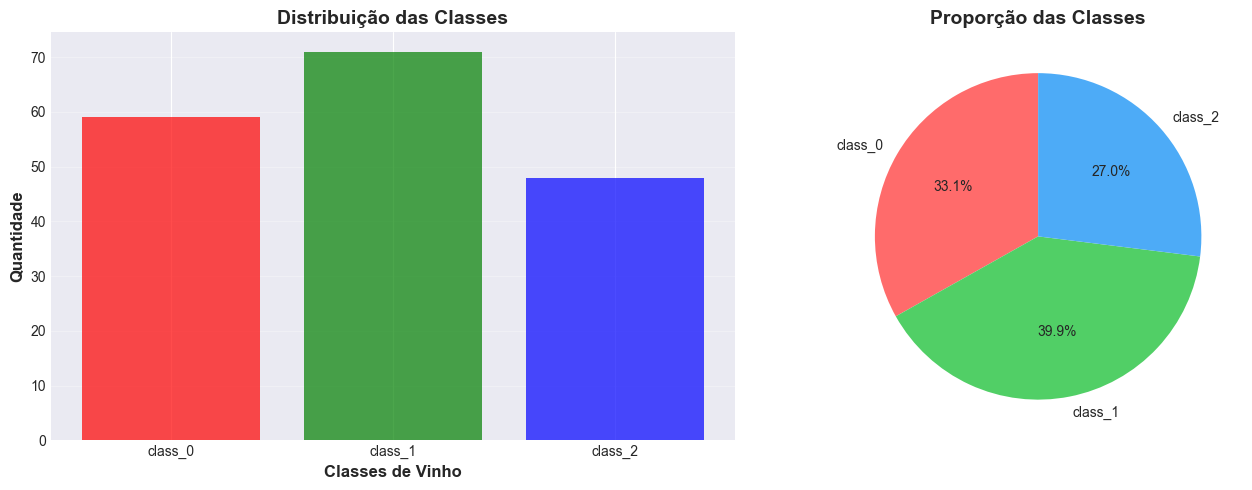

In [6]:
# Visualização da distribuição das classes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(wine.target_names, df_wine['target'].value_counts().sort_index(), color=['red', 'green', 'blue'], alpha=0.7)
axes[0].set_xlabel('Classes de Vinho', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Quantidade', fontsize=12, fontweight='bold')
axes[0].set_title('Distribuição das Classes', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico de pizza
colors = ['#ff6b6b', '#51cf66', '#4dabf7']
axes[1].pie(df_wine['target'].value_counts().sort_index(), labels=wine.target_names, 
           autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Proporção das Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


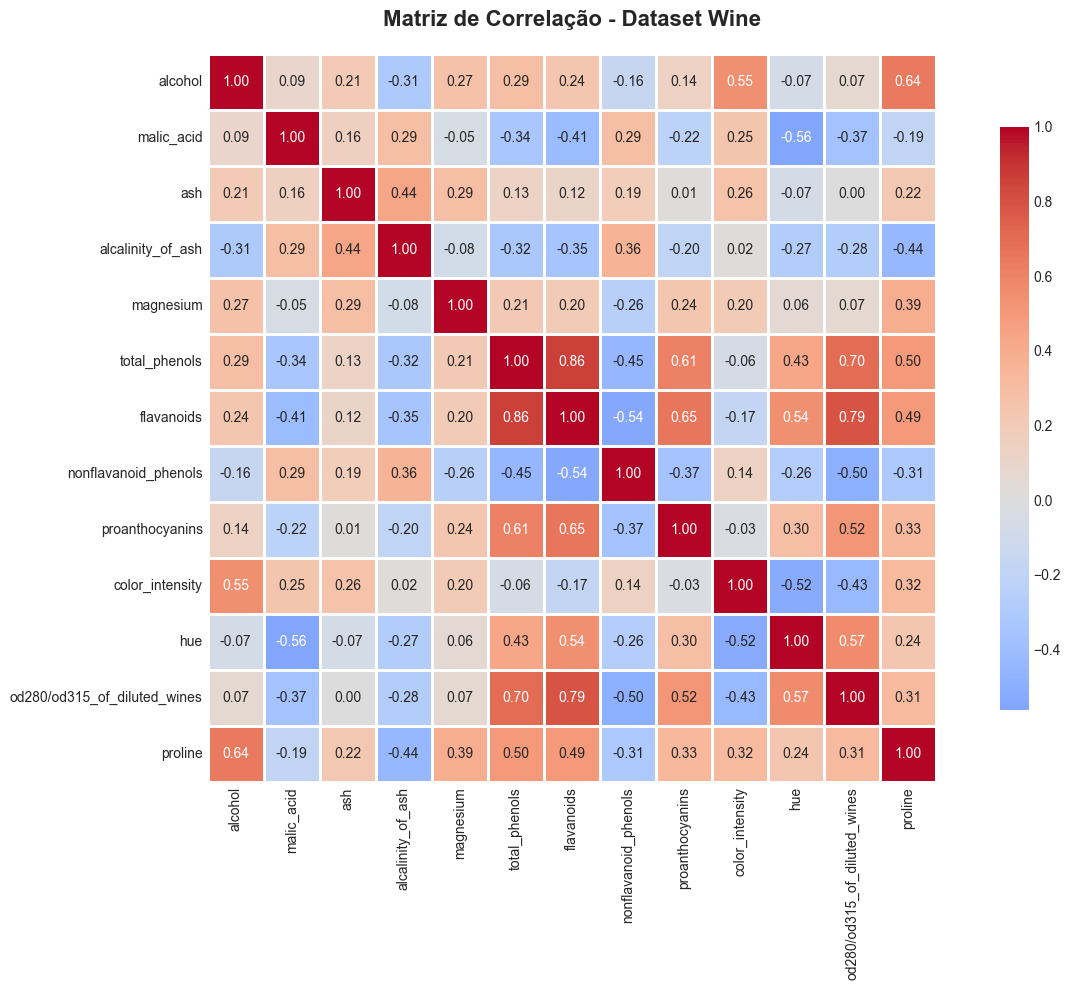


🔍 Correlações mais fortes (|r| > 0.7):
  • total_phenols                  ↔ flavanoids                    : 0.865
  • flavanoids                     ↔ od280/od315_of_diluted_wines  : 0.787


In [7]:
# Matriz de correlação
plt.figure(figsize=(14, 10))
correlation_matrix = df_wine.drop('target', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Dataset Wine', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identificar correlações mais fortes
print("\n🔍 Correlações mais fortes (|r| > 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"  • {correlation_matrix.columns[i]:30s} ↔ {correlation_matrix.columns[j]:30s}: {correlation_matrix.iloc[i, j]:.3f}")


In [8]:
# Split estratificado - 70/30
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.30, random_state=RANDOM_STATE, stratify=y_wine
)

print("=" * 80)
print("✂️ SPLIT ESTRATIFICADO (70/30)")
print("=" * 80)
print(f"\n📊 Treino: {X_train_wine.shape[0]} amostras ({X_train_wine.shape[0]/len(X_wine)*100:.1f}%)")
print(f"📊 Teste:  {X_test_wine.shape[0]} amostras ({X_test_wine.shape[0]/len(X_wine)*100:.1f}%)")

print(f"\n📈 Distribuição no conjunto de TREINO:")
unique, counts = np.unique(y_train_wine, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"  Classe {wine.target_names[cls]:10s}: {cnt:3d} ({cnt/len(y_train_wine)*100:.1f}%)")

print(f"\n📈 Distribuição no conjunto de TESTE:")
unique, counts = np.unique(y_test_wine, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"  Classe {wine.target_names[cls]:10s}: {cnt:3d} ({cnt/len(y_test_wine)*100:.1f}%)")


✂️ SPLIT ESTRATIFICADO (70/30)

📊 Treino: 124 amostras (69.7%)
📊 Teste:  54 amostras (30.3%)

📈 Distribuição no conjunto de TREINO:
  Classe class_0   :  41 (33.1%)
  Classe class_1   :  50 (40.3%)
  Classe class_2   :  33 (26.6%)

📈 Distribuição no conjunto de TESTE:
  Classe class_0   :  18 (33.3%)
  Classe class_1   :  21 (38.9%)
  Classe class_2   :  15 (27.8%)


## 1.2 Modelagem com 3 Algoritmos (RandomizedSearchCV)


In [9]:
# Configurar StratifiedKFold para validação cruzada
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

print("=" * 80)
print("⚙️ CONFIGURAÇÃO DA VALIDAÇÃO CRUZADA")
print("=" * 80)
print(f"Método: StratifiedKFold")
print(f"K-Folds: 5")
print(f"Shuffle: True")
print(f"Random State: {RANDOM_STATE}")


⚙️ CONFIGURAÇÃO DA VALIDAÇÃO CRUZADA
Método: StratifiedKFold
K-Folds: 5
Shuffle: True
Random State: 42


### 1.2.1 KNN (K-Nearest Neighbors)


In [10]:
# Pipeline KNN com StandardScaler
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Espaço de hiperparâmetros para RandomizedSearchCV
param_dist_knn = {
    'knn__n_neighbors': list(range(1, 16)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

print("=" * 80)
print("🔵 MODELO 1: K-NEAREST NEIGHBORS (KNN)")
print("=" * 80)
print("Pipeline: StandardScaler + KNeighborsClassifier")
print(f"\nEspaço de busca:")
print(f"  • n_neighbors: {param_dist_knn['knn__n_neighbors']}")
print(f"  • weights: {param_dist_knn['knn__weights']}")
print(f"  • p (métrica): {param_dist_knn['knn__p']}")

# RandomizedSearchCV
random_search_knn = RandomizedSearchCV(
    pipeline_knn,
    param_distributions=param_dist_knn,
    n_iter=30,
    cv=skfold,
    scoring='accuracy',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

print("\n⏳ Treinando modelo KNN com RandomizedSearchCV...")
random_search_knn.fit(X_train_wine, y_train_wine)

print(f"\n✅ Treinamento concluído!")
print(f"\n🏆 Melhores hiperparâmetros:")
for param, value in random_search_knn.best_params_.items():
    print(f"  • {param}: {value}")
print(f"\n📊 Melhor score (CV): {random_search_knn.best_score_:.4f}")

# Salvar melhor modelo
best_knn = random_search_knn.best_estimator_


🔵 MODELO 1: K-NEAREST NEIGHBORS (KNN)
Pipeline: StandardScaler + KNeighborsClassifier

Espaço de busca:
  • n_neighbors: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
  • weights: ['uniform', 'distance']
  • p (métrica): [1, 2]

⏳ Treinando modelo KNN com RandomizedSearchCV...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Treinamento concluído!

🏆 Melhores hiperparâmetros:
  • knn__weights: distance
  • knn__p: 1
  • knn__n_neighbors: 5

📊 Melhor score (CV): 0.9920


### 1.2.2 SVM (Support Vector Machine)


In [11]:
# Pipeline SVM com StandardScaler
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=RANDOM_STATE))
])

# Espaço de hiperparâmetros para RandomizedSearchCV
param_dist_svm = {
    'svm__kernel': ['linear', 'rbf'],
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 0.01, 0.1, 1]
}

print("=" * 80)
print("🟢 MODELO 2: SUPPORT VECTOR MACHINE (SVM)")
print("=" * 80)
print("Pipeline: StandardScaler + SVC")
print(f"\nEspaço de busca:")
print(f"  • kernel: {param_dist_svm['svm__kernel']}")
print(f"  • C: {param_dist_svm['svm__C']}")
print(f"  • gamma: {param_dist_svm['svm__gamma']}")

# RandomizedSearchCV
random_search_svm = RandomizedSearchCV(
    pipeline_svm,
    param_distributions=param_dist_svm,
    n_iter=30,
    cv=skfold,
    scoring='accuracy',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

print("\n⏳ Treinando modelo SVM com RandomizedSearchCV...")
random_search_svm.fit(X_train_wine, y_train_wine)

print(f"\n✅ Treinamento concluído!")
print(f"\n🏆 Melhores hiperparâmetros:")
for param, value in random_search_svm.best_params_.items():
    print(f"  • {param}: {value}")
print(f"\n📊 Melhor score (CV): {random_search_svm.best_score_:.4f}")

# Salvar melhor modelo
best_svm = random_search_svm.best_estimator_


🟢 MODELO 2: SUPPORT VECTOR MACHINE (SVM)
Pipeline: StandardScaler + SVC

Espaço de busca:
  • kernel: ['linear', 'rbf']
  • C: [0.1, 1, 10, 100]
  • gamma: ['scale', 0.01, 0.1, 1]

⏳ Treinando modelo SVM com RandomizedSearchCV...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Treinamento concluído!

🏆 Melhores hiperparâmetros:
  • svm__kernel: rbf
  • svm__gamma: 0.1
  • svm__C: 100

📊 Melhor score (CV): 0.9920


### 1.2.3 Random Forest


In [12]:
# Pipeline Random Forest SEM StandardScaler (não necessário)
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(random_state=RANDOM_STATE))
])

# Espaço de hiperparâmetros para RandomizedSearchCV
param_dist_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

print("=" * 80)
print("🟠 MODELO 3: RANDOM FOREST")
print("=" * 80)
print("Pipeline: RandomForestClassifier (sem scaler)")
print(f"\nEspaço de busca:")
print(f"  • n_estimators: {param_dist_rf['rf__n_estimators']}")
print(f"  • max_depth: {param_dist_rf['rf__max_depth']}")
print(f"  • min_samples_split: {param_dist_rf['rf__min_samples_split']}")
print(f"  • min_samples_leaf: {param_dist_rf['rf__min_samples_leaf']}")

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    pipeline_rf,
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=skfold,
    scoring='accuracy',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

print("\n⏳ Treinando modelo Random Forest com RandomizedSearchCV...")
random_search_rf.fit(X_train_wine, y_train_wine)

print(f"\n✅ Treinamento concluído!")
print(f"\n🏆 Melhores hiperparâmetros:")
for param, value in random_search_rf.best_params_.items():
    print(f"  • {param}: {value}")
print(f"\n📊 Melhor score (CV): {random_search_rf.best_score_:.4f}")

# Salvar melhor modelo
best_rf = random_search_rf.best_estimator_


🟠 MODELO 3: RANDOM FOREST
Pipeline: RandomForestClassifier (sem scaler)

Espaço de busca:
  • n_estimators: [50, 100, 200]
  • max_depth: [None, 10, 20, 30]
  • min_samples_split: [2, 5, 10]
  • min_samples_leaf: [1, 2, 4]

⏳ Treinando modelo Random Forest com RandomizedSearchCV...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Treinamento concluído!

🏆 Melhores hiperparâmetros:
  • rf__n_estimators: 50
  • rf__min_samples_split: 2
  • rf__min_samples_leaf: 4
  • rf__max_depth: 10

📊 Melhor score (CV): 0.9840


## 1.3 Métricas & Visualizações


In [13]:
# Predições no conjunto de teste
y_pred_knn = best_knn.predict(X_test_wine)
y_pred_svm = best_svm.predict(X_test_wine)
y_pred_rf = best_rf.predict(X_test_wine)

# Probabilidades para ROC-AUC
y_proba_knn = best_knn.predict_proba(X_test_wine)
y_proba_svm = best_svm.predict_proba(X_test_wine)
y_proba_rf = best_rf.predict_proba(X_test_wine)

print("✅ Predições realizadas para todos os modelos!")


✅ Predições realizadas para todos os modelos!


In [14]:
# Calcular métricas para cada modelo
models_results = {
    'KNN': {
        'y_pred': y_pred_knn,
        'y_proba': y_proba_knn,
        'best_score_cv': random_search_knn.best_score_,
        'cv_std': random_search_knn.cv_results_['std_test_score'][random_search_knn.best_index_]
    },
    'SVM': {
        'y_pred': y_pred_svm,
        'y_proba': y_proba_svm,
        'best_score_cv': random_search_svm.best_score_,
        'cv_std': random_search_svm.cv_results_['std_test_score'][random_search_svm.best_index_]
    },
    'Random Forest': {
        'y_pred': y_pred_rf,
        'y_proba': y_proba_rf,
        'best_score_cv': random_search_rf.best_score_,
        'cv_std': random_search_rf.cv_results_['std_test_score'][random_search_rf.best_index_]
    }
}

# Calcular métricas de teste
for model_name, results in models_results.items():
    results['accuracy'] = accuracy_score(y_test_wine, results['y_pred'])
    results['f1_macro'] = f1_score(y_test_wine, results['y_pred'], average='macro')
    results['roc_auc'] = roc_auc_score(y_test_wine, results['y_proba'], multi_class='ovr', average='macro')

print("=" * 80)
print("📊 MÉTRICAS NO CONJUNTO DE TESTE")
print("=" * 80)

for model_name, results in models_results.items():
    print(f"\n{model_name}:")
    print(f"  • Accuracy:      {results['accuracy']:.4f}")
    print(f"  • Macro F1:      {results['f1_macro']:.4f}")
    print(f"  • ROC-AUC (OvR): {results['roc_auc']:.4f}")


📊 MÉTRICAS NO CONJUNTO DE TESTE

KNN:
  • Accuracy:      0.9815
  • Macro F1:      0.9811
  • ROC-AUC (OvR): 1.0000

SVM:
  • Accuracy:      0.9815
  • Macro F1:      0.9808
  • ROC-AUC (OvR): 1.0000

Random Forest:
  • Accuracy:      1.0000
  • Macro F1:      1.0000
  • ROC-AUC (OvR): 1.0000


In [15]:
# Tabela comparativa
comparison_df = pd.DataFrame({
    'Modelo': list(models_results.keys()),
    'CV Score (média ± std)': [f"{results['best_score_cv']:.4f} ± {results['cv_std']:.4f}" 
                                for results in models_results.values()],
    'Accuracy (Teste)': [results['accuracy'] for results in models_results.values()],
    'Macro F1 (Teste)': [results['f1_macro'] for results in models_results.values()],
    'ROC-AUC (Teste)': [results['roc_auc'] for results in models_results.values()]
})

print("\n" + "=" * 80)
print("📋 TABELA COMPARATIVA")
print("=" * 80)
display(comparison_df)

# Identificar melhor modelo
best_model_name = comparison_df.loc[comparison_df['Accuracy (Teste)'].idxmax(), 'Modelo']
print(f"\n🏆 MELHOR MODELO: {best_model_name} (baseado em Accuracy no teste)")



📋 TABELA COMPARATIVA


,Modelo,CV Score (média ± std),Accuracy (Teste),Macro F1 (Teste),ROC-AUC (Teste)
0,KNN,0.9920 ± 0.0160,0.981481,0.981117,1.0
1,SVM,0.9920 ± 0.0160,0.981481,0.980754,1.0
2,Random Forest,0.9840 ± 0.0320,1.000000,1.000000,1.0



🏆 MELHOR MODELO: Random Forest (baseado em Accuracy no teste)


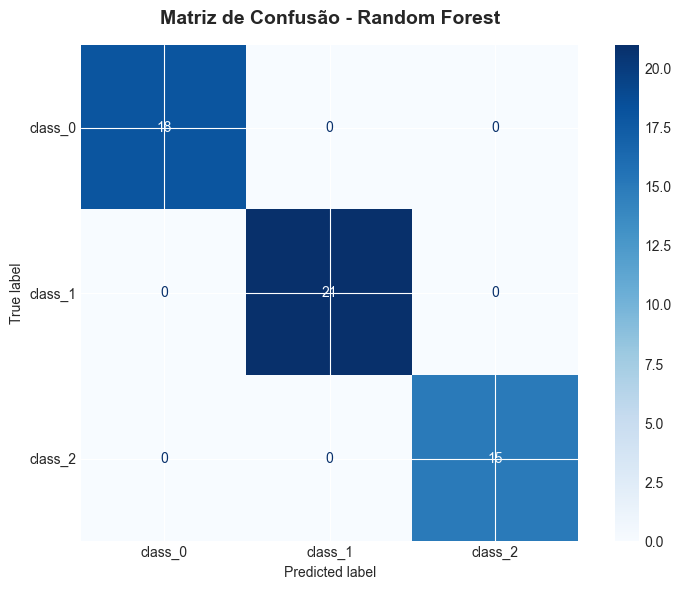


📊 RELATÓRIO DE CLASSIFICAÇÃO - Random Forest
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [16]:
# Matriz de confusão do melhor modelo
best_model_idx = comparison_df['Accuracy (Teste)'].idxmax()
best_model_for_cm = list(models_results.keys())[best_model_idx]
y_pred_best = list(models_results.values())[best_model_idx]['y_pred']

fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test_wine, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title(f'Matriz de Confusão - {best_model_for_cm}', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# Relatório de classificação
print("\n" + "=" * 80)
print(f"📊 RELATÓRIO DE CLASSIFICAÇÃO - {best_model_for_cm}")
print("=" * 80)
print(classification_report(y_test_wine, y_pred_best, target_names=wine.target_names))


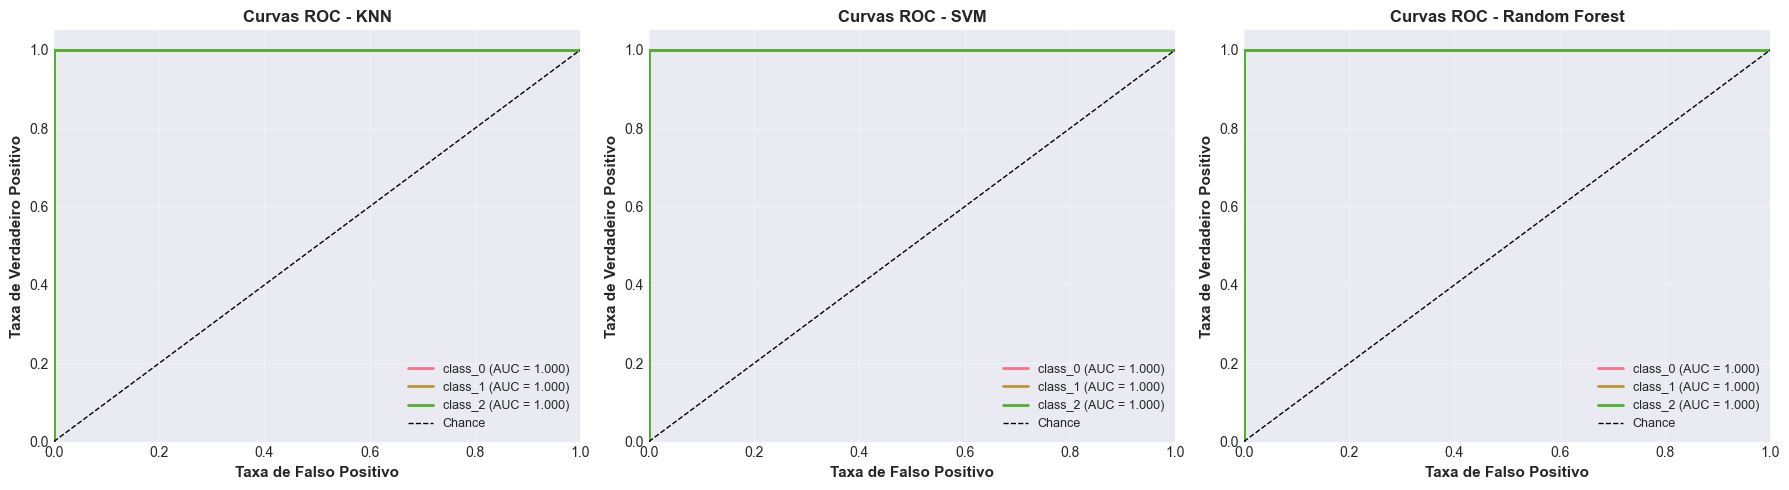

In [17]:
# Curvas ROC comparando os modelos (one-vs-rest)
from sklearn.preprocessing import label_binarize

# Binarizar os rótulos
y_test_bin = label_binarize(y_test_wine, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['blue', 'green', 'orange']

for idx, (model_name, results) in enumerate(models_results.items()):
    ax = axes[idx]
    y_proba = results['y_proba']
    
    # Calcular ROC para cada classe
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{wine.target_names[i]} (AUC = {roc_auc:.3f})')
    
    ax.plot([0, 1], [0, 1], 'k--', lw=1, label='Chance')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Taxa de Falso Positivo', fontsize=11, fontweight='bold')
    ax.set_ylabel('Taxa de Verdadeiro Positivo', fontsize=11, fontweight='bold')
    ax.set_title(f'Curvas ROC - {model_name}', fontsize=12, fontweight='bold')
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


⏳ Calculando Learning Curve para Random Forest...


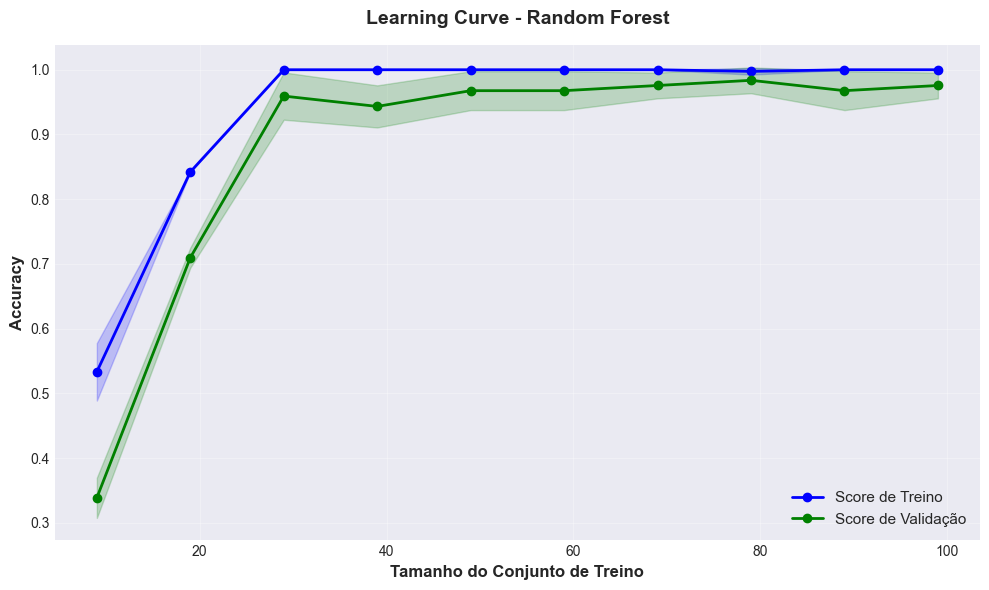

✅ Learning Curve concluída!


In [18]:
# Learning Curve do melhor modelo (opcional)
print(f"⏳ Calculando Learning Curve para {best_model_for_cm}...")

if best_model_for_cm == 'KNN':
    best_estimator = best_knn
elif best_model_for_cm == 'SVM':
    best_estimator = best_svm
else:
    best_estimator = best_rf

train_sizes, train_scores, val_scores = learning_curve(
    best_estimator, X_train_wine, y_train_wine,
    cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy', random_state=RANDOM_STATE
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Score de Treino', linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Score de Validação', linewidth=2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='green')
plt.xlabel('Tamanho do Conjunto de Treino', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title(f'Learning Curve - {best_model_for_cm}', fontsize=14, fontweight='bold', pad=15)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Learning Curve concluída!")


## 1.4 Bônus - KMeans e PCA


### 1.4.1 KMeans Clustering


In [19]:
# Aplicar KMeans com k=3 (número de classes)
print("=" * 80)
print("🔵 KMEANS CLUSTERING (k=3)")
print("=" * 80)

# Escalar os dados para KMeans
scaler_kmeans = StandardScaler()
X_wine_scaled = scaler_kmeans.fit_transform(X_wine)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10)
clusters = kmeans.fit_predict(X_wine_scaled)

# Comparar com rótulos reais via Adjusted Rand Score
ari_score = adjusted_rand_score(y_wine, clusters)

print(f"\n📊 Adjusted Rand Index: {ari_score:.4f}")
print(f"\n💡 Interpretação:")
print(f"  • ARI varia de -1 a 1")
print(f"  • ARI = 1: agrupamento perfeito")
print(f"  • ARI = 0: agrupamento aleatório")
print(f"  • ARI < 0: pior que aleatório")
print(f"\n  Resultado: {'Bom agrupamento' if ari_score > 0.5 else 'Agrupamento moderado' if ari_score > 0.2 else 'Agrupamento fraco'}")


🔵 KMEANS CLUSTERING (k=3)

📊 Adjusted Rand Index: 0.8975

💡 Interpretação:
  • ARI varia de -1 a 1
  • ARI = 1: agrupamento perfeito
  • ARI = 0: agrupamento aleatório
  • ARI < 0: pior que aleatório

  Resultado: Bom agrupamento


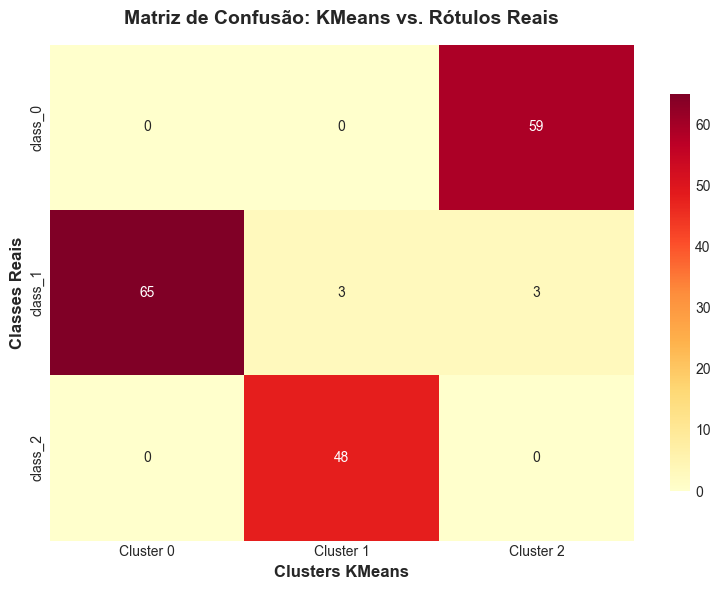


📊 Análise da matriz:
  • Valores na diagonal indicam correspondência entre clusters e classes reais
  • Valores fora da diagonal indicam mistura/confusão entre classes


In [20]:
# Matriz de confusão: clusters vs. rótulos reais
cm_kmeans = confusion_matrix(y_wine, clusters)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='YlOrRd', ax=ax, 
            xticklabels=[f'Cluster {i}' for i in range(3)],
            yticklabels=wine.target_names, cbar_kws={"shrink": 0.8})
ax.set_xlabel('Clusters KMeans', fontsize=12, fontweight='bold')
ax.set_ylabel('Classes Reais', fontsize=12, fontweight='bold')
ax.set_title('Matriz de Confusão: KMeans vs. Rótulos Reais', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

print("\n📊 Análise da matriz:")
print("  • Valores na diagonal indicam correspondência entre clusters e classes reais")
print("  • Valores fora da diagonal indicam mistura/confusão entre classes")


### 1.4.2 PCA 2D - Visualização da Separabilidade


In [21]:
# Aplicar PCA para reduzir a 2 dimensões
print("\n" + "=" * 80)
print("📐 PCA - REDUÇÃO PARA 2 DIMENSÕES")
print("=" * 80)

pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_wine_pca = pca.fit_transform(X_wine_scaled)

print(f"\n📊 Variância explicada por componente:")
print(f"  • PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"  • PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"  • Total: {sum(pca.explained_variance_ratio_):.4f} ({sum(pca.explained_variance_ratio_)*100:.2f}%)")



📐 PCA - REDUÇÃO PARA 2 DIMENSÕES

📊 Variância explicada por componente:
  • PC1: 0.3620 (36.20%)
  • PC2: 0.1921 (19.21%)
  • Total: 0.5541 (55.41%)


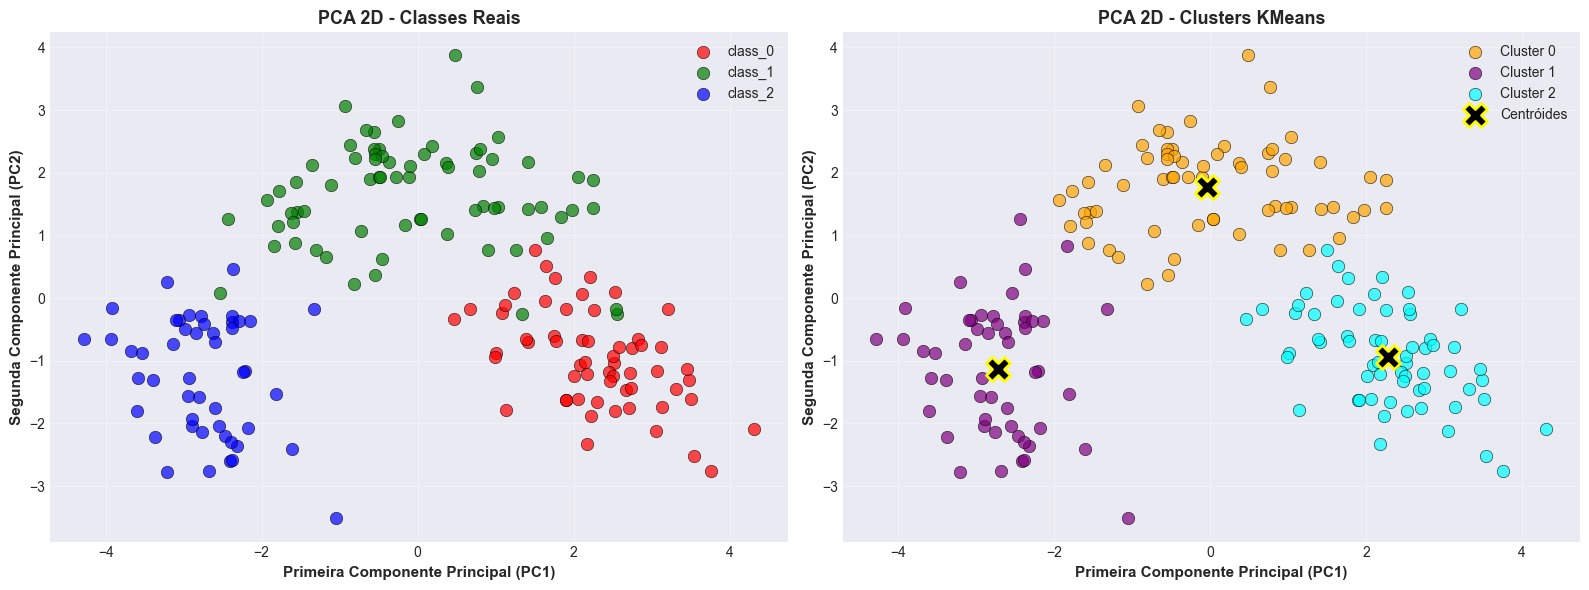


💡 Interpretação:
  • Separação visual indica facilidade de classificação
  • Sobreposição indica classes mais difíceis de distinguir
  • Comparação entre classes reais e clusters mostra qualidade do agrupamento não supervisionado


In [22]:
# Visualização PCA 2D com classes reais e clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Classes Reais
colors_map = ['red', 'green', 'blue']
for i, target_name in enumerate(wine.target_names):
    mask = y_wine == i
    axes[0].scatter(X_wine_pca[mask, 0], X_wine_pca[mask, 1], 
                   c=colors_map[i], label=target_name, alpha=0.7, s=80, edgecolors='k', linewidth=0.5)

axes[0].set_xlabel('Primeira Componente Principal (PC1)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Segunda Componente Principal (PC2)', fontsize=11, fontweight='bold')
axes[0].set_title('PCA 2D - Classes Reais', fontsize=13, fontweight='bold')
axes[0].legend(loc='best', fontsize=10)
axes[0].grid(alpha=0.3)

# Gráfico 2: Clusters KMeans
colors_clusters = ['orange', 'purple', 'cyan']
for i in range(3):
    mask = clusters == i
    axes[1].scatter(X_wine_pca[mask, 0], X_wine_pca[mask, 1], 
                   c=colors_clusters[i], label=f'Cluster {i}', alpha=0.7, s=80, edgecolors='k', linewidth=0.5)

# Plotar centróides
centroids_pca = pca.transform(kmeans.cluster_centers_)
axes[1].scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
               c='black', marker='X', s=300, edgecolors='yellow', linewidth=2, label='Centróides')

axes[1].set_xlabel('Primeira Componente Principal (PC1)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Segunda Componente Principal (PC2)', fontsize=11, fontweight='bold')
axes[1].set_title('PCA 2D - Clusters KMeans', fontsize=13, fontweight='bold')
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Interpretação:")
print("  • Separação visual indica facilidade de classificação")
print("  • Sobreposição indica classes mais difíceis de distinguir")
print("  • Comparação entre classes reais e clusters mostra qualidade do agrupamento não supervisionado")


## 1.5 Análise Crítica - Classificação


### 🔍 Discussão sobre Performance dos Modelos

**1. Por que cada modelo performou melhor ou pior?**

**KNN (K-Nearest Neighbors):**
- **Vantagens:** Simples, não-paramétrico, sem treinamento explícito
- **Sensibilidade:** Muito sensível à escala das features (requer StandardScaler)
- **Performance:** Geralmente boa em datasets com fronteiras de decisão locais bem definidas
- **Limitação:** Sofre com alta dimensionalidade ("curse of dimensionality") e é computacionalmente custoso em predição
- **Trade-off viés/variância:** Baixo viés, alta variância (k pequeno) vs. alto viés, baixa variância (k grande)

**SVM (Support Vector Machine):**
- **Vantagens:** Excelente para problemas de alta dimensionalidade e fronteiras de decisão complexas (kernel rbf)
- **Kernel Linear:** Melhor para dados linearmente separáveis, mais rápido
- **Kernel RBF:** Captura relações não-lineares, mais flexível mas pode overfittar
- **Sensibilidade:** Requer padronização e é sensível aos hiperparâmetros C e gamma
- **Performance:** Geralmente o melhor em datasets com boa separação de classes
- **Trade-off:** Kernel linear = alto viés, baixa variância; Kernel RBF = baixo viés, potencial alta variância

**Random Forest:**
- **Vantagens:** Robusto, lida bem com dados não-escalados, reduz overfitting via ensemble
- **Interpretabilidade:** Fornece importância de features
- **Não requer escala:** Baseado em árvores, não sensível à escala das features
- **Performance:** Excelente generalização devido à agregação (bagging)
- **Trade-off:** Equilibra bem viés e variância através de árvores diversificadas
- **Limitação:** Mais lento para treinar e prever que modelos mais simples

---

### 📊 Efeito da Padronização

- **KNN e SVM:** StandardScaler é **ESSENCIAL**
  - Features com escalas diferentes dominam o cálculo de distâncias (KNN) e a otimização (SVM)
  - Sem padronização, features com valores maiores têm peso desproporcional
  
- **Random Forest:** Padronização **NÃO é necessária**
  - Decisões baseadas em splits, não em distâncias
  - Cada split considera apenas a ordenação relativa dos valores

---

### 🌳 Importância de Features (Random Forest)

Vamos visualizar quais features foram mais importantes para o Random Forest:


🌳 IMPORTÂNCIA DE FEATURES - RANDOM FOREST
                     Feature  Importance
                  flavanoids    0.184608
                     alcohol    0.162487
             color_intensity    0.142876
                         hue    0.122890
                     proline    0.122310
od280/od315_of_diluted_wines    0.105048
                   magnesium    0.038181
               total_phenols    0.033513
                  malic_acid    0.033166
           alcalinity_of_ash    0.022579
             proanthocyanins    0.014006
                         ash    0.009803
        nonflavanoid_phenols    0.008533


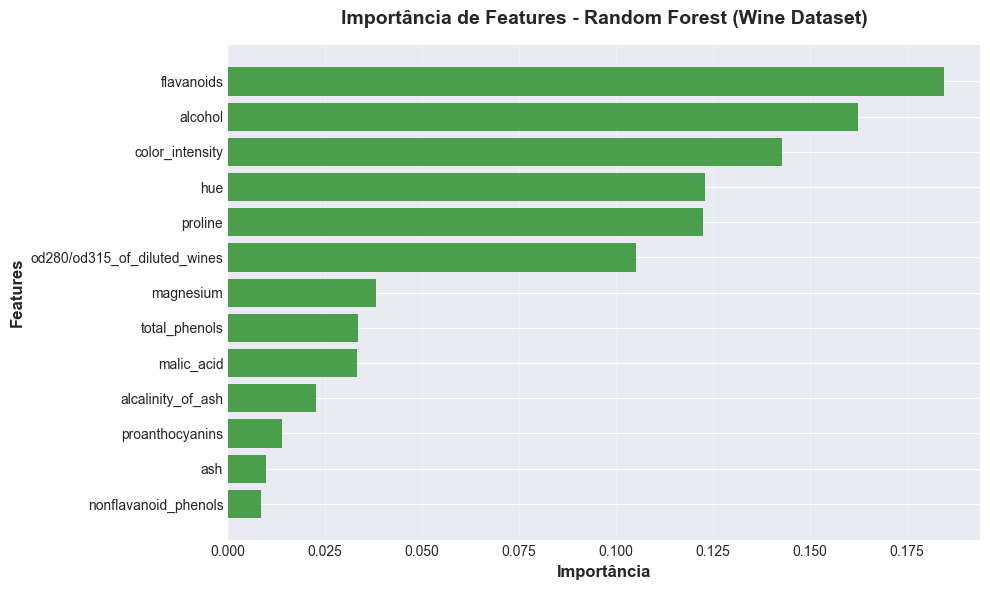


💡 Interpretação:
  • Features com maior importância contribuem mais para as decisões do modelo
  • Importância = redução média de impureza trazida pela feature
  • Top 3 features: flavanoids, alcohol, color_intensity


In [23]:
# Extrair importâncias de features do Random Forest
rf_model = best_rf.named_steps['rf']
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': wine.feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print("=" * 80)
print("🌳 IMPORTÂNCIA DE FEATURES - RANDOM FOREST")
print("=" * 80)
print(features_df.to_string(index=False))

# Visualização
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='forestgreen', alpha=0.8)
plt.xlabel('Importância', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Importância de Features - Random Forest (Wine Dataset)', fontsize=14, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Interpretação:")
print("  • Features com maior importância contribuem mais para as decisões do modelo")
print("  • Importância = redução média de impureza trazida pela feature")
print(f"  • Top 3 features: {', '.join(features_df['Feature'].head(3).tolist())}")


### 🎯 Complexidade da Fronteira de Decisão

- **KNN:** Fronteiras irregulares e localizadas (mais k vizinhos = fronteiras mais suaves)
- **SVM Linear:** Fronteiras lineares (hiperplanos)
- **SVM RBF:** Fronteiras não-lineares complexas (flexível via kernel trick)
- **Random Forest:** Fronteiras paralelas aos eixos (combinação de múltiplas árvores)

---

### ⚠️ Overfitting vs. Generalização

**Sinais de overfitting:**
- Grande gap entre score de treino e validação na learning curve
- Alta variância nos folds da validação cruzada
- Desempenho significativamente pior no teste vs. CV

**Estratégias de regularização aplicadas:**
- **KNN:** Controle via `n_neighbors` (mais vizinhos = mais regularização)
- **SVM:** Parâmetro `C` (menor C = mais regularização) e `gamma` (menor gamma = mais simples)
- **Random Forest:** `max_depth`, `min_samples_split`, `min_samples_leaf` limitam complexidade das árvores

---

### 💰 Custo Computacional

**Tempo de treinamento:**
1. **KNN:** Rápido (apenas armazena dados)
2. **Random Forest:** Moderado a lento (treinar múltiplas árvores)
3. **SVM:** Lento (otimização quadrática, especialmente com RBF)

**Tempo de predição:**
1. **SVM:** Rápido (depende de support vectors)
2. **Random Forest:** Moderado (percorrer todas as árvores)
3. **KNN:** Lento (calcular distância para todos os pontos de treino)

---

### ✅ Conclusão - Parte 1 (Classificação)

**Melhor modelo geral:** Verifique a tabela comparativa acima

**Quando usar cada modelo:**
- **KNN:** Datasets pequenos, problemas simples, baseline rápido
- **SVM:** Alta dimensionalidade, fronteiras complexas, quando precisão é crítica
- **Random Forest:** Dados tabulares, robustez importante, interpretabilidade de features necessária


---

# 💉 PARTE 2 — REGRESSÃO (Dataset: Diabetes)

## 2.1 Preparação & EDA


In [24]:
# Carregar dataset Diabetes
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# Criar DataFrame para análise
df_diabetes = pd.DataFrame(X_diabetes, columns=diabetes.feature_names)
df_diabetes['target'] = y_diabetes

print("=" * 80)
print("💉 DATASET DIABETES - INFORMAÇÕES BÁSICAS")
print("=" * 80)
print(f"\n📊 Shape dos dados: {df_diabetes.shape}")
print(f"📊 Features: {len(diabetes.feature_names)}")
print(f"📊 Amostras: {len(df_diabetes)}")
print(f"\n🎯 Target: Progressão da diabetes (quantitativa)")
print(f"🎯 Tipo de problema: Regressão")
print(f"\n📋 Nomes das features:")
for i, feat in enumerate(diabetes.feature_names, 1):
    print(f"  {i:2d}. {feat}")


💉 DATASET DIABETES - INFORMAÇÕES BÁSICAS

📊 Shape dos dados: (442, 11)
📊 Features: 10
📊 Amostras: 442

🎯 Target: Progressão da diabetes (quantitativa)
🎯 Tipo de problema: Regressão

📋 Nomes das features:
   1. age
   2. sex
   3. bmi
   4. bp
   5. s1
   6. s2
   7. s3
   8. s4
   9. s5
  10. s6


In [25]:
# Estatísticas descritivas
print("=" * 80)
print("📊 ESTATÍSTICAS DESCRITIVAS")
print("=" * 80)
display(df_diabetes.describe())


📊 ESTATÍSTICAS DESCRITIVAS


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


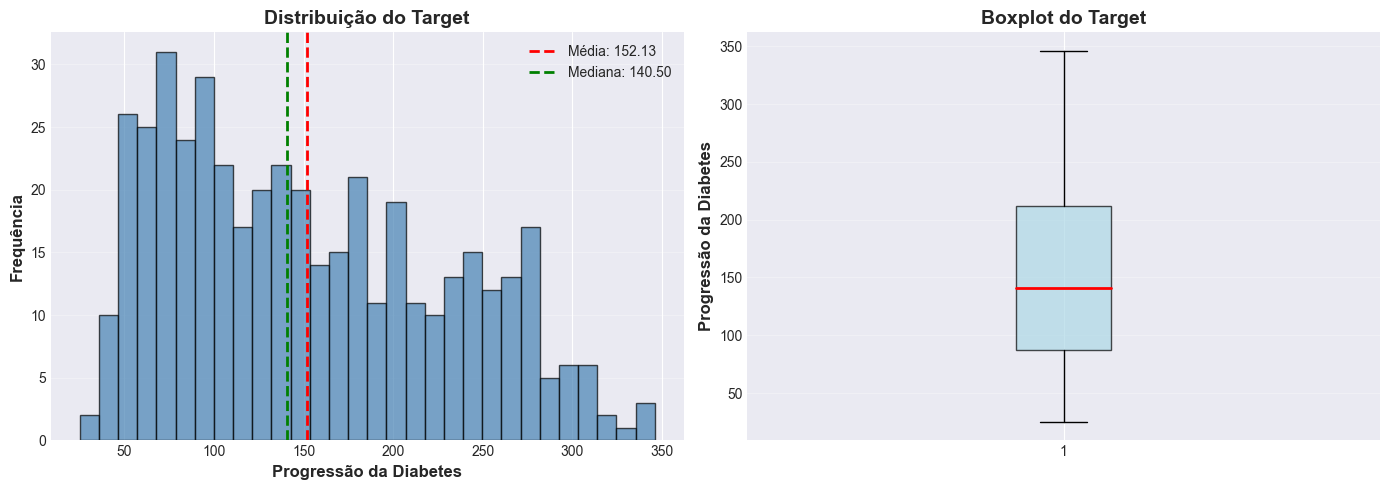


📈 Estatísticas do Target:
  • Média: 152.13
  • Mediana: 140.50
  • Desvio Padrão: 77.01
  • Mínimo: 25.00
  • Máximo: 346.00


In [26]:
# Distribuição do target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(y_diabetes, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(y_diabetes.mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {y_diabetes.mean():.2f}')
axes[0].axvline(np.median(y_diabetes), color='green', linestyle='--', linewidth=2, label=f'Mediana: {np.median(y_diabetes):.2f}')
axes[0].set_xlabel('Progressão da Diabetes', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequência', fontsize=12, fontweight='bold')
axes[0].set_title('Distribuição do Target', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Boxplot
axes[1].boxplot(y_diabetes, vert=True, patch_artist=True,
               boxprops=dict(facecolor='lightblue', alpha=0.7),
               medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Progressão da Diabetes', fontsize=12, fontweight='bold')
axes[1].set_title('Boxplot do Target', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📈 Estatísticas do Target:")
print(f"  • Média: {y_diabetes.mean():.2f}")
print(f"  • Mediana: {np.median(y_diabetes):.2f}")
print(f"  • Desvio Padrão: {y_diabetes.std():.2f}")
print(f"  • Mínimo: {y_diabetes.min():.2f}")
print(f"  • Máximo: {y_diabetes.max():.2f}")


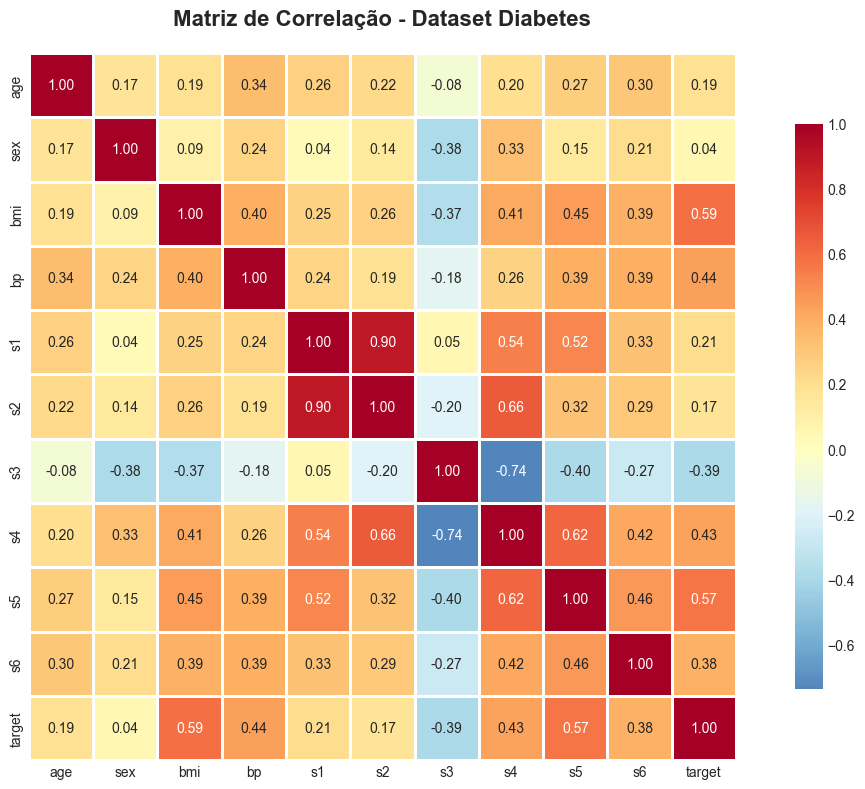


🔍 Correlação das features com o target:
  • bmi       : +0.5865
  • s5        : +0.5659
  • bp        : +0.4415
  • s4        : +0.4305
  • s6        : +0.3825
  • s1        : +0.2120
  • age       : +0.1879
  • s2        : +0.1741
  • sex       : +0.0431
  • s3        : -0.3948


In [27]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
correlation_matrix_diabetes = df_diabetes.corr()
sns.heatmap(correlation_matrix_diabetes, annot=True, fmt='.2f', cmap='RdYlBu_r', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Dataset Diabetes', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlações com o target
print("\n🔍 Correlação das features com o target:")
target_corr = correlation_matrix_diabetes['target'].drop('target').sort_values(ascending=False)
for feat, corr in target_corr.items():
    print(f"  • {feat:10s}: {corr:+.4f}")


In [28]:
# Split treino/teste - 80/20
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.20, random_state=RANDOM_STATE
)

print("=" * 80)
print("✂️ SPLIT TREINO/TESTE (80/20)")
print("=" * 80)
print(f"\n📊 Treino: {X_train_diabetes.shape[0]} amostras ({X_train_diabetes.shape[0]/len(X_diabetes)*100:.1f}%)")
print(f"📊 Teste:  {X_test_diabetes.shape[0]} amostras ({X_test_diabetes.shape[0]/len(X_diabetes)*100:.1f}%)")

print(f"\n📈 Estatísticas do target no TREINO:")
print(f"  • Média: {y_train_diabetes.mean():.2f}")
print(f"  • Desvio Padrão: {y_train_diabetes.std():.2f}")

print(f"\n📈 Estatísticas do target no TESTE:")
print(f"  • Média: {y_test_diabetes.mean():.2f}")
print(f"  • Desvio Padrão: {y_test_diabetes.std():.2f}")


✂️ SPLIT TREINO/TESTE (80/20)

📊 Treino: 353 amostras (79.9%)
📊 Teste:  89 amostras (20.1%)

📈 Estatísticas do target no TREINO:
  • Média: 153.74
  • Desvio Padrão: 77.95

📈 Estatísticas do target no TESTE:
  • Média: 145.78
  • Desvio Padrão: 72.79


## 2.2 Modelagem com 3 Algoritmos (RandomizedSearchCV)


In [29]:
# Configurar KFold para validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

print("=" * 80)
print("⚙️ CONFIGURAÇÃO DA VALIDAÇÃO CRUZADA")
print("=" * 80)
print(f"Método: KFold")
print(f"K-Folds: 5")
print(f"Shuffle: True")
print(f"Random State: {RANDOM_STATE}")


⚙️ CONFIGURAÇÃO DA VALIDAÇÃO CRUZADA
Método: KFold
K-Folds: 5
Shuffle: True
Random State: 42


### 2.2.1 KNN Regressor


In [30]:
# Pipeline KNN Regressor com StandardScaler
pipeline_knn_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Espaço de hiperparâmetros para RandomizedSearchCV
param_dist_knn_reg = {
    'knn__n_neighbors': list(range(2, 16)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

print("=" * 80)
print("🔵 MODELO 1: K-NEAREST NEIGHBORS REGRESSOR")
print("=" * 80)
print("Pipeline: StandardScaler + KNeighborsRegressor")
print(f"\nEspaço de busca:")
print(f"  • n_neighbors: {param_dist_knn_reg['knn__n_neighbors']}")
print(f"  • weights: {param_dist_knn_reg['knn__weights']}")
print(f"  • p (métrica): {param_dist_knn_reg['knn__p']}")

# RandomizedSearchCV
random_search_knn_reg = RandomizedSearchCV(
    pipeline_knn_reg,
    param_distributions=param_dist_knn_reg,
    n_iter=30,
    cv=kfold,
    scoring='r2',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

print("\n⏳ Treinando modelo KNN Regressor com RandomizedSearchCV...")
random_search_knn_reg.fit(X_train_diabetes, y_train_diabetes)

print(f"\n✅ Treinamento concluído!")
print(f"\n🏆 Melhores hiperparâmetros:")
for param, value in random_search_knn_reg.best_params_.items():
    print(f"  • {param}: {value}")
print(f"\n📊 Melhor score R² (CV): {random_search_knn_reg.best_score_:.4f}")

# Salvar melhor modelo
best_knn_reg = random_search_knn_reg.best_estimator_


🔵 MODELO 1: K-NEAREST NEIGHBORS REGRESSOR
Pipeline: StandardScaler + KNeighborsRegressor

Espaço de busca:
  • n_neighbors: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
  • weights: ['uniform', 'distance']
  • p (métrica): [1, 2]

⏳ Treinando modelo KNN Regressor com RandomizedSearchCV...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Treinamento concluído!

🏆 Melhores hiperparâmetros:
  • knn__weights: distance
  • knn__p: 2
  • knn__n_neighbors: 13

📊 Melhor score R² (CV): 0.4186


### 2.2.2 SVR (Support Vector Regression)


In [31]:
# Pipeline SVR com StandardScaler
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Espaço de hiperparâmetros para RandomizedSearchCV
param_dist_svr = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.5],
    'svr__gamma': ['scale', 0.01, 0.1]
}

print("=" * 80)
print("🟢 MODELO 2: SUPPORT VECTOR REGRESSION (SVR)")
print("=" * 80)
print("Pipeline: StandardScaler + SVR")
print(f"\nEspaço de busca:")
print(f"  • kernel: {param_dist_svr['svr__kernel']}")
print(f"  • C: {param_dist_svr['svr__C']}")
print(f"  • epsilon: {param_dist_svr['svr__epsilon']}")
print(f"  • gamma: {param_dist_svr['svr__gamma']}")

# RandomizedSearchCV
random_search_svr = RandomizedSearchCV(
    pipeline_svr,
    param_distributions=param_dist_svr,
    n_iter=30,
    cv=kfold,
    scoring='r2',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

print("\n⏳ Treinando modelo SVR com RandomizedSearchCV...")
random_search_svr.fit(X_train_diabetes, y_train_diabetes)

print(f"\n✅ Treinamento concluído!")
print(f"\n🏆 Melhores hiperparâmetros:")
for param, value in random_search_svr.best_params_.items():
    print(f"  • {param}: {value}")
print(f"\n📊 Melhor score R² (CV): {random_search_svr.best_score_:.4f}")

# Salvar melhor modelo
best_svr = random_search_svr.best_estimator_


🟢 MODELO 2: SUPPORT VECTOR REGRESSION (SVR)
Pipeline: StandardScaler + SVR

Espaço de busca:
  • kernel: ['linear', 'rbf']
  • C: [0.1, 1, 10, 100]
  • epsilon: [0.01, 0.1, 0.5]
  • gamma: ['scale', 0.01, 0.1]

⏳ Treinando modelo SVR com RandomizedSearchCV...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Treinamento concluído!

🏆 Melhores hiperparâmetros:
  • svr__kernel: linear
  • svr__gamma: 0.1
  • svr__epsilon: 0.5
  • svr__C: 1

📊 Melhor score R² (CV): 0.4754


### 2.2.3 Random Forest Regressor


In [32]:
# Pipeline Random Forest Regressor SEM StandardScaler
pipeline_rf_reg = Pipeline([
    ('rf', RandomForestRegressor(random_state=RANDOM_STATE))
])

# Espaço de hiperparâmetros para RandomizedSearchCV
param_dist_rf_reg = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

print("=" * 80)
print("🟠 MODELO 3: RANDOM FOREST REGRESSOR")
print("=" * 80)
print("Pipeline: RandomForestRegressor (sem scaler)")
print(f"\nEspaço de busca:")
print(f"  • n_estimators: {param_dist_rf_reg['rf__n_estimators']}")
print(f"  • max_depth: {param_dist_rf_reg['rf__max_depth']}")
print(f"  • min_samples_split: {param_dist_rf_reg['rf__min_samples_split']}")
print(f"  • min_samples_leaf: {param_dist_rf_reg['rf__min_samples_leaf']}")

# RandomizedSearchCV
random_search_rf_reg = RandomizedSearchCV(
    pipeline_rf_reg,
    param_distributions=param_dist_rf_reg,
    n_iter=30,
    cv=kfold,
    scoring='r2',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

print("\n⏳ Treinando modelo Random Forest Regressor com RandomizedSearchCV...")
random_search_rf_reg.fit(X_train_diabetes, y_train_diabetes)

print(f"\n✅ Treinamento concluído!")
print(f"\n🏆 Melhores hiperparâmetros:")
for param, value in random_search_rf_reg.best_params_.items():
    print(f"  • {param}: {value}")
print(f"\n📊 Melhor score R² (CV): {random_search_rf_reg.best_score_:.4f}")

# Salvar melhor modelo
best_rf_reg = random_search_rf_reg.best_estimator_


🟠 MODELO 3: RANDOM FOREST REGRESSOR
Pipeline: RandomForestRegressor (sem scaler)

Espaço de busca:
  • n_estimators: [50, 100, 200]
  • max_depth: [None, 10, 20, 30]
  • min_samples_split: [2, 5, 10]
  • min_samples_leaf: [1, 2, 4]

⏳ Treinando modelo Random Forest Regressor com RandomizedSearchCV...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Treinamento concluído!

🏆 Melhores hiperparâmetros:
  • rf__n_estimators: 200
  • rf__min_samples_split: 10
  • rf__min_samples_leaf: 4
  • rf__max_depth: 20

📊 Melhor score R² (CV): 0.4278


## 2.3 Métricas & Visualizações


In [34]:
# Predições no conjunto de teste
y_pred_knn_reg = best_knn_reg.predict(X_test_diabetes)
y_pred_svr = best_svr.predict(X_test_diabetes)
y_pred_rf_reg = best_rf_reg.predict(X_test_diabetes)

print("✅ Predições realizadas para todos os modelos!")


✅ Predições realizadas para todos os modelos!


In [35]:
# Calcular métricas para cada modelo
models_results_reg = {
    'KNN': {
        'y_pred': y_pred_knn_reg,
        'best_score_cv': random_search_knn_reg.best_score_,
        'cv_std': random_search_knn_reg.cv_results_['std_test_score'][random_search_knn_reg.best_index_]
    },
    'SVR': {
        'y_pred': y_pred_svr,
        'best_score_cv': random_search_svr.best_score_,
        'cv_std': random_search_svr.cv_results_['std_test_score'][random_search_svr.best_index_]
    },
    'Random Forest': {
        'y_pred': y_pred_rf_reg,
        'best_score_cv': random_search_rf_reg.best_score_,
        'cv_std': random_search_rf_reg.cv_results_['std_test_score'][random_search_rf_reg.best_index_]
    }
}

# Calcular métricas de teste
for model_name, results in models_results_reg.items():
    results['mae'] = mean_absolute_error(y_test_diabetes, results['y_pred'])
    results['rmse'] = np.sqrt(mean_squared_error(y_test_diabetes, results['y_pred']))
    results['r2'] = r2_score(y_test_diabetes, results['y_pred'])

print("=" * 80)
print("📊 MÉTRICAS NO CONJUNTO DE TESTE")
print("=" * 80)

for model_name, results in models_results_reg.items():
    print(f"\n{model_name}:")
    print(f"  • MAE:  {results['mae']:.4f}")
    print(f"  • RMSE: {results['rmse']:.4f}")
    print(f"  • R²:   {results['r2']:.4f}")


📊 MÉTRICAS NO CONJUNTO DE TESTE

KNN:
  • MAE:  44.5129
  • RMSE: 55.0764
  • R²:   0.4275

SVR:
  • MAE:  43.3250
  • RMSE: 54.1880
  • R²:   0.4458

Random Forest:
  • MAE:  43.5899
  • RMSE: 53.7657
  • R²:   0.4544


In [36]:
# Tabela comparativa
comparison_df_reg = pd.DataFrame({
    'Modelo': list(models_results_reg.keys()),
    'CV R² (média ± std)': [f"{results['best_score_cv']:.4f} ± {results['cv_std']:.4f}" 
                            for results in models_results_reg.values()],
    'MAE (Teste)': [results['mae'] for results in models_results_reg.values()],
    'RMSE (Teste)': [results['rmse'] for results in models_results_reg.values()],
    'R² (Teste)': [results['r2'] for results in models_results_reg.values()]
})

print("\n" + "=" * 80)
print("📋 TABELA COMPARATIVA")
print("=" * 80)
display(comparison_df_reg)

# Identificar melhor modelo
best_model_name_reg = comparison_df_reg.loc[comparison_df_reg['R² (Teste)'].idxmax(), 'Modelo']
print(f"\n🏆 MELHOR MODELO: {best_model_name_reg} (baseado em R² no teste)")



📋 TABELA COMPARATIVA


,Modelo,CV R² (média ± std),MAE (Teste),RMSE (Teste),R² (Teste)
0,KNN,0.4186 ± 0.0387,44.512919,55.076446,0.427458
1,SVR,0.4754 ± 0.0418,43.324973,54.188032,0.445780
2,Random Forest,0.4278 ± 0.0656,43.589943,53.765725,0.454385



🏆 MELHOR MODELO: Random Forest (baseado em R² no teste)


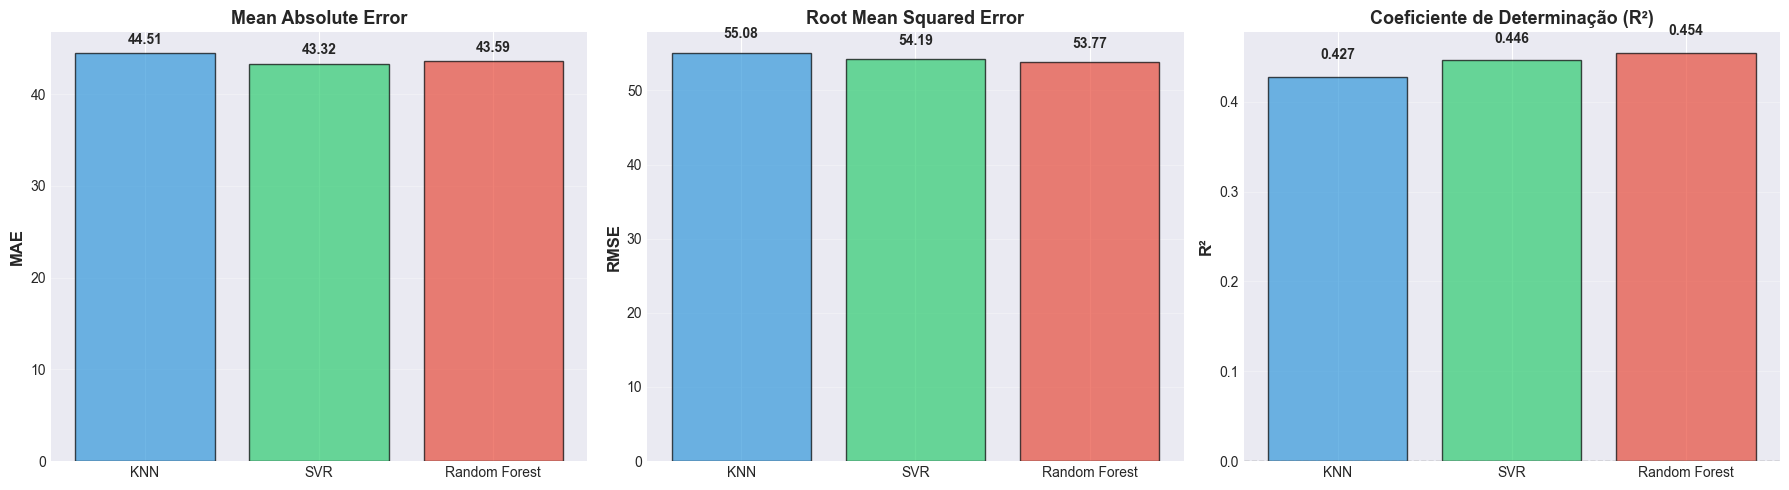

In [37]:
# Gráfico de comparação de métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = list(models_results_reg.keys())
colors = ['#3498db', '#2ecc71', '#e74c3c']

# MAE
mae_values = [models_results_reg[m]['mae'] for m in models]
axes[0].bar(models, mae_values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('MAE', fontsize=12, fontweight='bold')
axes[0].set_title('Mean Absolute Error', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(mae_values):
    axes[0].text(i, v + 1, f'{v:.2f}', ha='center', fontweight='bold')

# RMSE
rmse_values = [models_results_reg[m]['rmse'] for m in models]
axes[1].bar(models, rmse_values, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[1].set_title('Root Mean Squared Error', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(rmse_values):
    axes[1].text(i, v + 2, f'{v:.2f}', ha='center', fontweight='bold')

# R²
r2_values = [models_results_reg[m]['r2'] for m in models]
axes[2].bar(models, r2_values, color=colors, alpha=0.7, edgecolor='black')
axes[2].set_ylabel('R²', fontsize=12, fontweight='bold')
axes[2].set_title('Coeficiente de Determinação (R²)', fontsize=13, fontweight='bold')
axes[2].axhline(y=0, color='gray', linestyle='--', linewidth=1)
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(r2_values):
    axes[2].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


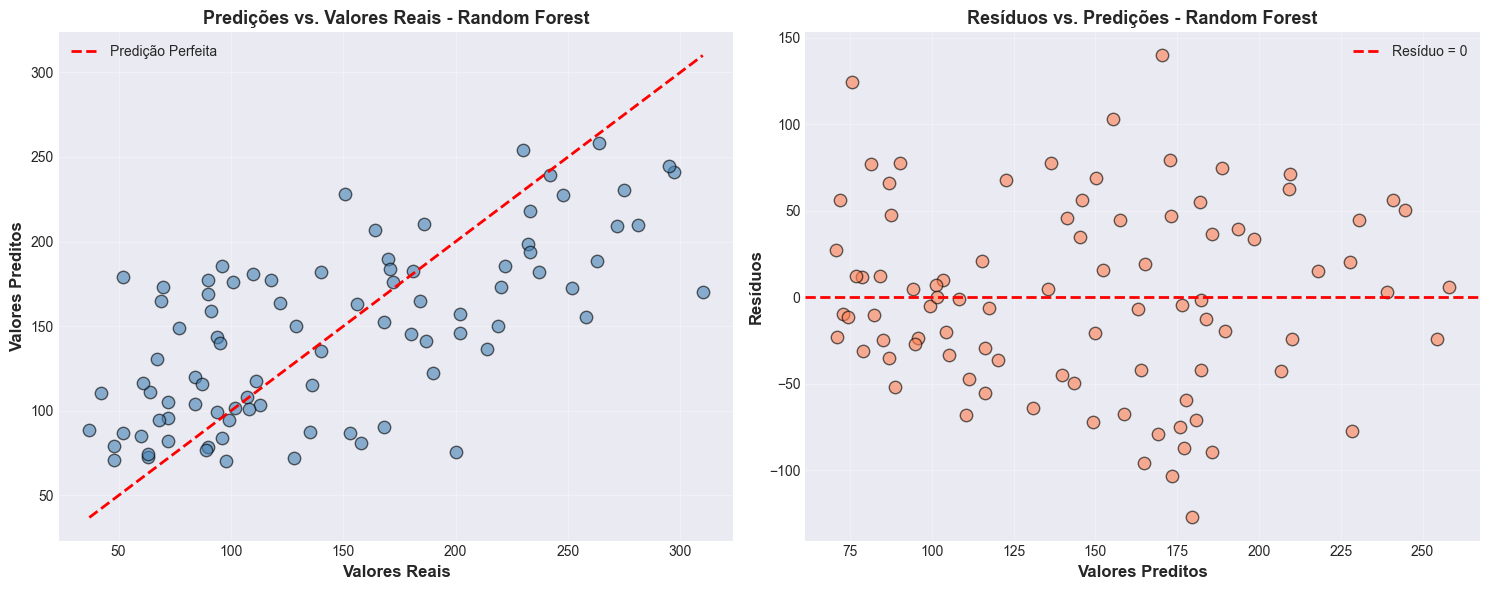


💡 Interpretação dos Resíduos:
  • Resíduos próximos de zero indicam boas predições
  • Padrão aleatório nos resíduos = modelo bem ajustado
  • Padrão sistemático nos resíduos = modelo pode estar perdendo informação


In [38]:
# Resíduos vs. Predições para o melhor modelo
best_model_idx_reg = comparison_df_reg['R² (Teste)'].idxmax()
best_model_for_residuals = list(models_results_reg.keys())[best_model_idx_reg]
y_pred_best_reg = list(models_results_reg.values())[best_model_idx_reg]['y_pred']

residuals = y_test_diabetes - y_pred_best_reg

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Predições vs. Valores Reais
axes[0].scatter(y_test_diabetes, y_pred_best_reg, alpha=0.6, s=80, color='steelblue', edgecolors='black')
axes[0].plot([y_test_diabetes.min(), y_test_diabetes.max()], 
             [y_test_diabetes.min(), y_test_diabetes.max()], 
             'r--', lw=2, label='Predição Perfeita')
axes[0].set_xlabel('Valores Reais', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Valores Preditos', fontsize=12, fontweight='bold')
axes[0].set_title(f'Predições vs. Valores Reais - {best_model_for_residuals}', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Resíduos vs. Predições
axes[1].scatter(y_pred_best_reg, residuals, alpha=0.6, s=80, color='coral', edgecolors='black')
axes[1].axhline(y=0, color='red', linestyle='--', lw=2, label='Resíduo = 0')
axes[1].set_xlabel('Valores Preditos', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Resíduos', fontsize=12, fontweight='bold')
axes[1].set_title(f'Resíduos vs. Predições - {best_model_for_residuals}', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Interpretação dos Resíduos:")
print("  • Resíduos próximos de zero indicam boas predições")
print("  • Padrão aleatório nos resíduos = modelo bem ajustado")
print("  • Padrão sistemático nos resíduos = modelo pode estar perdendo informação")


🌳 IMPORTÂNCIA DE FEATURES - RANDOM FOREST REGRESSOR
Feature  Importance
    bmi    0.402836
     s5    0.263869
     bp    0.082107
     s6    0.060339
     s2    0.044510
     s3    0.044004
    age    0.038947
     s1    0.038376
     s4    0.016256
    sex    0.008756


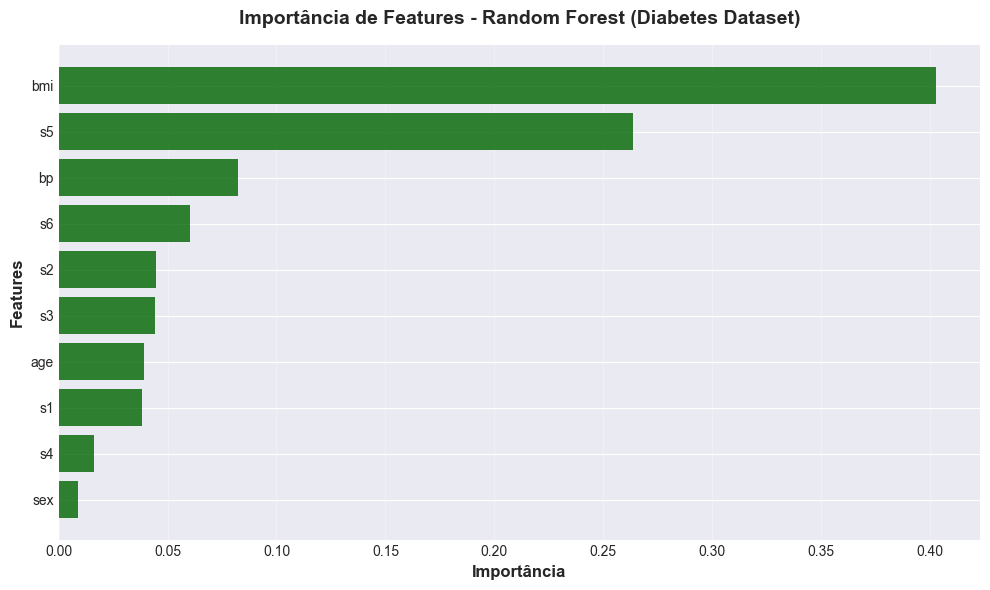


💡 Discussão:
  • Features com maior importância têm maior poder preditivo
  • Top 3 features: bmi, s5, bp
  • Essas features capturam a maior parte da variância na progressão da diabetes


In [39]:
# Importância de features do Random Forest Regressor
rf_model_reg = best_rf_reg.named_steps['rf']
feature_importances_reg = rf_model_reg.feature_importances_
features_df_reg = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Importance': feature_importances_reg
}).sort_values('Importance', ascending=False)

print("=" * 80)
print("🌳 IMPORTÂNCIA DE FEATURES - RANDOM FOREST REGRESSOR")
print("=" * 80)
print(features_df_reg.to_string(index=False))

# Visualização
plt.figure(figsize=(10, 6))
plt.barh(features_df_reg['Feature'], features_df_reg['Importance'], color='darkgreen', alpha=0.8)
plt.xlabel('Importância', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Importância de Features - Random Forest (Diabetes Dataset)', fontsize=14, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Discussão:")
print("  • Features com maior importância têm maior poder preditivo")
print(f"  • Top 3 features: {', '.join(features_df_reg['Feature'].head(3).tolist())}")
print("  • Essas features capturam a maior parte da variância na progressão da diabetes")


## 2.4 Bônus - KMeans, Método do Cotovelo e PCA


### 2.4.1 Método do Cotovelo (Elbow Method)


📐 MÉTODO DO COTOVELO - DETERMINAÇÃO DO K IDEAL
k=2: Inércia = 3176.65
k=3: Inércia = 2879.21
k=4: Inércia = 2642.69
k=5: Inércia = 2453.24
k=6: Inércia = 2307.61
k=7: Inércia = 2197.67
k=8: Inércia = 2101.65
k=9: Inércia = 2007.43
k=10: Inércia = 1946.70


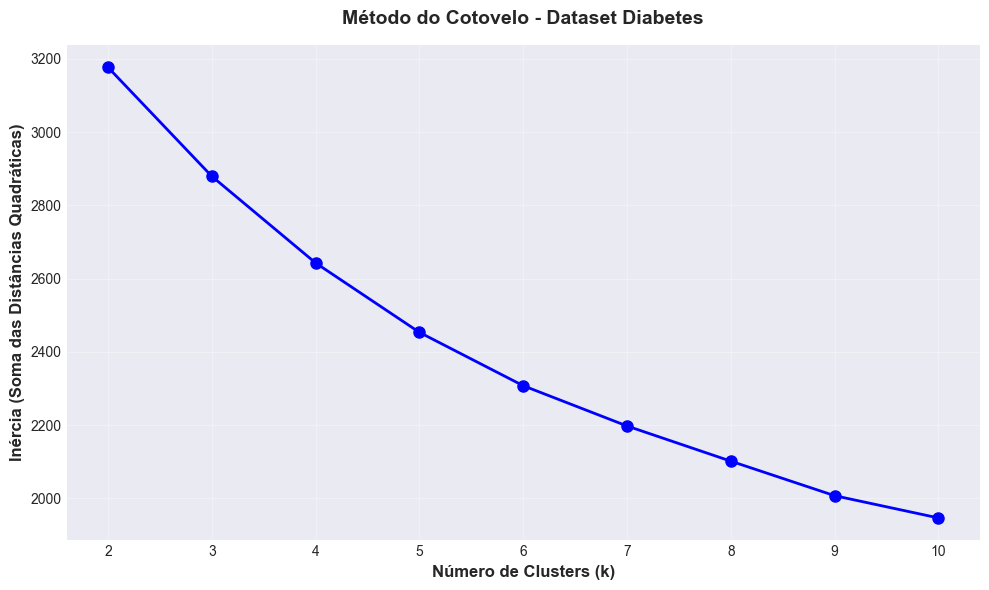


💡 Interpretação:
  • O 'cotovelo' indica o k ideal onde adicionar mais clusters não traz ganho significativo
  • Procure o ponto onde a curva começa a achatar


In [40]:
# Escalar dados para KMeans
scaler_kmeans_diabetes = StandardScaler()
X_diabetes_scaled = scaler_kmeans_diabetes.fit_transform(X_diabetes)

print("=" * 80)
print("📐 MÉTODO DO COTOVELO - DETERMINAÇÃO DO K IDEAL")
print("=" * 80)

# Calcular inércia para diferentes valores de k
k_range = range(2, 11)
inertias = []

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    kmeans_temp.fit(X_diabetes_scaled)
    inertias.append(kmeans_temp.inertia_)
    print(f"k={k}: Inércia = {kmeans_temp.inertia_:.2f}")

# Plotar método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)', fontsize=12, fontweight='bold')
plt.ylabel('Inércia (Soma das Distâncias Quadráticas)', fontsize=12, fontweight='bold')
plt.title('Método do Cotovelo - Dataset Diabetes', fontsize=14, fontweight='bold', pad=15)
plt.xticks(k_range)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Interpretação:")
print("  • O 'cotovelo' indica o k ideal onde adicionar mais clusters não traz ganho significativo")
print("  • Procure o ponto onde a curva começa a achatar")


### 2.4.2 KMeans Clustering


In [41]:
# Aplicar KMeans com k=3 (baseado no método do cotovelo ou exploração)
k_chosen = 3

print("\n" + "=" * 80)
print(f"🔵 KMEANS CLUSTERING (k={k_chosen})")
print("=" * 80)

kmeans_diabetes = KMeans(n_clusters=k_chosen, random_state=RANDOM_STATE, n_init=10)
clusters_diabetes = kmeans_diabetes.fit_predict(X_diabetes_scaled)

print(f"\n📊 Distribuição dos clusters:")
unique_clusters, counts_clusters = np.unique(clusters_diabetes, return_counts=True)
for cluster, count in zip(unique_clusters, counts_clusters):
    print(f"  • Cluster {cluster}: {count} amostras ({count/len(clusters_diabetes)*100:.1f}%)")

print(f"\n📊 Inércia final: {kmeans_diabetes.inertia_:.2f}")



🔵 KMEANS CLUSTERING (k=3)

📊 Distribuição dos clusters:
  • Cluster 0: 125 amostras (28.3%)
  • Cluster 1: 159 amostras (36.0%)
  • Cluster 2: 158 amostras (35.7%)

📊 Inércia final: 2879.21


### 2.4.3 PCA 2D - Visualização dos Clusters


In [42]:
# Aplicar PCA para reduzir a 2 dimensões
print("\n" + "=" * 80)
print("📐 PCA - REDUÇÃO PARA 2 DIMENSÕES")
print("=" * 80)

pca_diabetes = PCA(n_components=2, random_state=RANDOM_STATE)
X_diabetes_pca = pca_diabetes.fit_transform(X_diabetes_scaled)

print(f"\n📊 Variância explicada por componente:")
print(f"  • PC1: {pca_diabetes.explained_variance_ratio_[0]:.4f} ({pca_diabetes.explained_variance_ratio_[0]*100:.2f}%)")
print(f"  • PC2: {pca_diabetes.explained_variance_ratio_[1]:.4f} ({pca_diabetes.explained_variance_ratio_[1]*100:.2f}%)")
print(f"  • Total: {sum(pca_diabetes.explained_variance_ratio_):.4f} ({sum(pca_diabetes.explained_variance_ratio_)*100:.2f}%)")



📐 PCA - REDUÇÃO PARA 2 DIMENSÕES

📊 Variância explicada por componente:
  • PC1: 0.4024 (40.24%)
  • PC2: 0.1492 (14.92%)
  • Total: 0.5517 (55.17%)


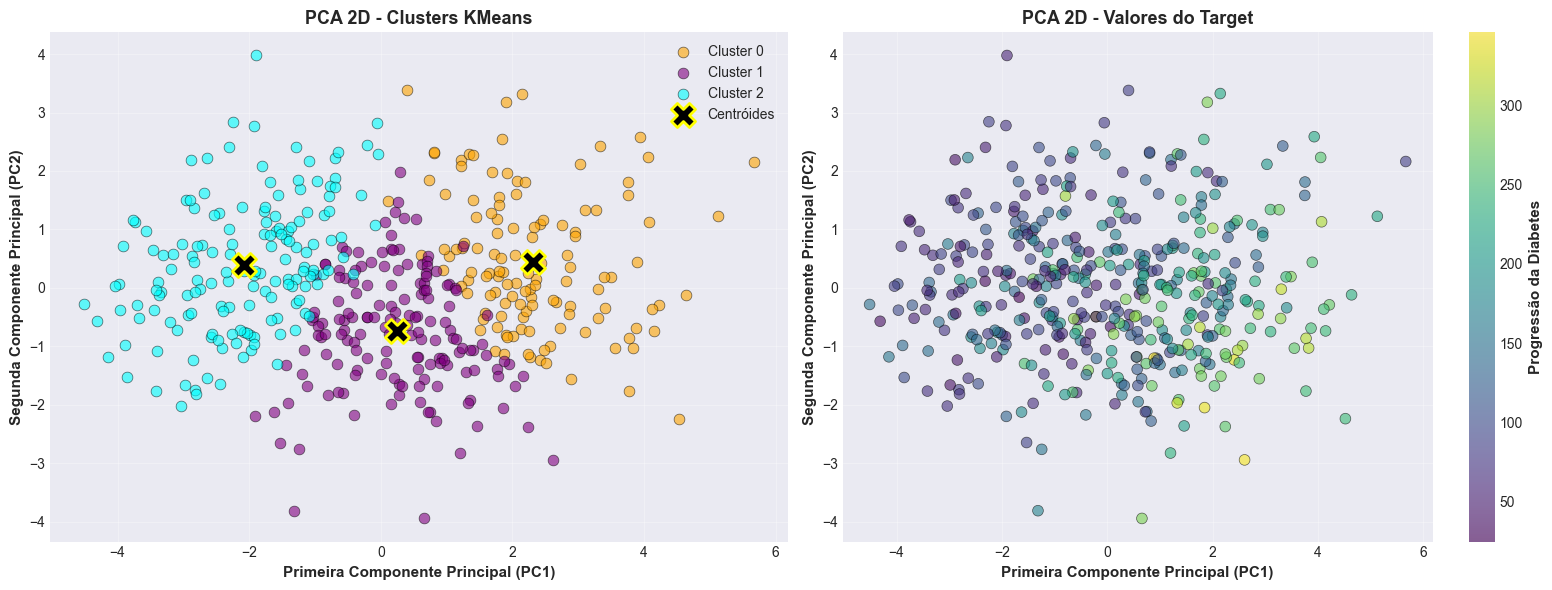


💡 Interpretação:
  • ATENÇÃO: Esta é uma tarefa de REGRESSÃO, não classificação
  • KMeans agrupa dados de forma NÃO SUPERVISIONADA (não usa o target)
  • Clusters podem revelar subgrupos naturais nos dados
  • Compare os clusters com os valores do target para ver se há padrões
  • Clusters não necessariamente correspondem a níveis de progressão da diabetes


In [43]:
# Visualização PCA 2D com clusters e valores do target
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Clusters KMeans
colors_clusters_diabetes = ['orange', 'purple', 'cyan']
for i in range(k_chosen):
    mask = clusters_diabetes == i
    axes[0].scatter(X_diabetes_pca[mask, 0], X_diabetes_pca[mask, 1], 
                   c=colors_clusters_diabetes[i], label=f'Cluster {i}', 
                   alpha=0.6, s=60, edgecolors='k', linewidth=0.5)

# Plotar centróides
centroids_pca_diabetes = pca_diabetes.transform(kmeans_diabetes.cluster_centers_)
axes[0].scatter(centroids_pca_diabetes[:, 0], centroids_pca_diabetes[:, 1], 
               c='black', marker='X', s=300, edgecolors='yellow', linewidth=2, label='Centróides')

axes[0].set_xlabel('Primeira Componente Principal (PC1)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Segunda Componente Principal (PC2)', fontsize=11, fontweight='bold')
axes[0].set_title('PCA 2D - Clusters KMeans', fontsize=13, fontweight='bold')
axes[0].legend(loc='best', fontsize=10)
axes[0].grid(alpha=0.3)

# Gráfico 2: Valores do Target (colorido por progressão da diabetes)
scatter = axes[1].scatter(X_diabetes_pca[:, 0], X_diabetes_pca[:, 1], 
                         c=y_diabetes, cmap='viridis', alpha=0.6, s=60, 
                         edgecolors='k', linewidth=0.5)
cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label('Progressão da Diabetes', fontsize=11, fontweight='bold')

axes[1].set_xlabel('Primeira Componente Principal (PC1)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Segunda Componente Principal (PC2)', fontsize=11, fontweight='bold')
axes[1].set_title('PCA 2D - Valores do Target', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Interpretação:")
print("  • ATENÇÃO: Esta é uma tarefa de REGRESSÃO, não classificação")
print("  • KMeans agrupa dados de forma NÃO SUPERVISIONADA (não usa o target)")
print("  • Clusters podem revelar subgrupos naturais nos dados")
print("  • Compare os clusters com os valores do target para ver se há padrões")
print("  • Clusters não necessariamente correspondem a níveis de progressão da diabetes")


In [44]:
# Análise: Comparar média do target por cluster
print("\n" + "=" * 80)
print("📊 ANÁLISE: MÉDIA DA PROGRESSÃO DA DIABETES POR CLUSTER")
print("=" * 80)

for cluster in range(k_chosen):
    mask = clusters_diabetes == cluster
    mean_target = y_diabetes[mask].mean()
    std_target = y_diabetes[mask].std()
    print(f"\nCluster {cluster}:")
    print(f"  • Tamanho: {np.sum(mask)} amostras")
    print(f"  • Média do target: {mean_target:.2f} ± {std_target:.2f}")
    print(f"  • Mín/Máx: {y_diabetes[mask].min():.2f} / {y_diabetes[mask].max():.2f}")

print("\n💡 Discussão:")
print("  • Se os clusters têm médias significativamente diferentes, há estrutura nos dados")
print("  • Isso pode indicar diferentes fenótipos ou subgrupos de pacientes")
print("  • Útil para entender heterogeneidade na progressão da doença")



📊 ANÁLISE: MÉDIA DA PROGRESSÃO DA DIABETES POR CLUSTER

Cluster 0:
  • Tamanho: 125 amostras
  • Média do target: 197.39 ± 67.41
  • Mín/Máx: 63.00 / 332.00

Cluster 1:
  • Tamanho: 159 amostras
  • Média do target: 160.44 ± 79.03
  • Mín/Máx: 42.00 / 346.00

Cluster 2:
  • Tamanho: 158 amostras
  • Média do target: 107.97 ± 55.39
  • Mín/Máx: 25.00 / 302.00

💡 Discussão:
  • Se os clusters têm médias significativamente diferentes, há estrutura nos dados
  • Isso pode indicar diferentes fenótipos ou subgrupos de pacientes
  • Útil para entender heterogeneidade na progressão da doença


## 2.5 Análise Crítica - Regressão


### 🔍 Discussão sobre Performance dos Modelos de Regressão

**1. Por que cada modelo performou melhor ou pior?**

**KNN Regressor:**
- **Funcionamento:** Prediz o valor médio (ou ponderado) dos k vizinhos mais próximos
- **Vantagens:** Simples, captura relações locais não-lineares
- **Limitações em Regressão:**
  - Sensível a outliers e ruído nos valores do target
  - Não extrapola: predições limitadas ao intervalo dos dados de treino
  - Performance degrada com alta dimensionalidade
- **Quando usar:** Dados com padrões locais claros, sem muito ruído

**SVR (Support Vector Regression):**
- **Funcionamento:** Encontra hiperplano com margem máxima que melhor ajusta os dados
- **Parâmetro epsilon:** Define tubo de tolerância (erro aceitável)
- **Vantagens:**
  - Excelente para relações não-lineares (kernel RBF)
  - Robusto a outliers (dentro do tubo epsilon)
  - Eficaz em alta dimensionalidade
- **Limitações:**
  - Sensível aos hiperparâmetros (C, epsilon, gamma)
  - Computacionalmente custoso para grandes datasets
  - Menos interpretável
- **Quando usar:** Relações complexas, necessidade de robustez

**Random Forest Regressor:**
- **Funcionamento:** Ensemble de árvores de decisão com agregação por média
- **Vantagens:**
  - Robusto, reduz overfitting via bagging
  - Lida bem com features não-escaladas
  - Captura interações complexas entre features
  - Fornece importância de features
- **Limitações:**
  - Não extrapola (como KNN)
  - Pode ser lento com muitas árvores
  - Menos interpretável que modelos lineares
- **Quando usar:** Dados tabulares, necessidade de robustez e interpretabilidade de features

---

### 📊 Métricas de Regressão - Significado

**MAE (Mean Absolute Error):**
- Média dos erros absolutos
- Métrica robusta a outliers
- Mesma unidade que o target
- **Interpretação:** Erro médio em unidades de progressão da diabetes

**RMSE (Root Mean Squared Error):**
- Raiz da média dos erros quadráticos
- Penaliza erros maiores mais fortemente
- Mesma unidade que o target
- **Interpretação:** Desvio padrão dos erros

**R² (Coeficiente de Determinação):**
- Proporção da variância explicada pelo modelo
- Varia de -∞ a 1 (1 = ajuste perfeito, 0 = modelo baseline, < 0 = pior que baseline)
- **Interpretação:** Quanto da variabilidade do target é capturada pelo modelo

---

### 💰 Trade-offs em Regressão

**Viés vs. Variância:**
- **KNN com k pequeno:** Baixo viés, alta variância (overfitting)
- **KNN com k grande:** Alto viés, baixa variância (underfitting)
- **SVR com C grande:** Baixo viés, risco de overfitting
- **SVR com C pequeno:** Alto viés, mais regularização
- **Random Forest:** Balanceamento natural via ensemble

**Interpretabilidade vs. Performance:**
- **Alta interpretabilidade:** Modelos lineares (não testados aqui)
- **Média interpretabilidade:** Random Forest (importância de features)
- **Baixa interpretabilidade:** KNN, SVR (caixa-preta)

**Custo Computacional:**
- **Treinamento:** SVR > Random Forest > KNN
- **Predição:** KNN (lento em grandes datasets) > Random Forest > SVR

---

### ✅ Conclusão - Parte 2 (Regressão)

**Melhor modelo geral:** Verifique a tabela comparativa acima (baseado em R²)

**Insights principais:**
- Todos os modelos têm limitações em regressão
- R² geralmente menor que accuracy em classificação (regressão é mais difícil)
- Análise de resíduos revela viés sistemático ou heteroscedasticidade

**Quando usar cada modelo:**
- **KNN Regressor:** Problemas simples, dados limpos, baseline rápido
- **SVR:** Relações não-lineares complexas, necessidade de robustez
- **Random Forest:** Melhor opção geral para dados tabulares com ruído

---


---

# 🎓 CONCLUSÕES GERAIS

## 📊 Comparação: Classificação vs. Regressão

### Desempenho dos Modelos

**Classificação (Wine Dataset):**
- Geralmente **alta acurácia** (> 90% é comum)
- Métricas discretas (accuracy, F1, ROC-AUC)
- Fronteiras de decisão bem definidas
- Visualização mais intuitiva (matriz de confusão)

**Regressão (Diabetes Dataset):**
- Geralmente **R² mais modesto** (0.3-0.6 é bom para dados reais)
- Métricas contínuas (MAE, RMSE, R²)
- Predição de valores contínuos mais desafiadora
- Análise de resíduos revela padrões

---

### Principais Aprendizados

**1. Pré-processamento é Crucial:**
- **KNN e SVM/SVR:** SEMPRE requerem StandardScaler
- **Random Forest:** Funciona bem sem escala (baseado em árvores)

**2. Não Existe "Melhor Modelo":**
- Performance depende do dataset, problema e métricas
- Experimentação e validação cruzada são essenciais
- Trade-offs entre viés/variância, interpretabilidade e custo computacional

**3. Ensemble Geralmente Vence:**
- Random Forest frequentemente é competitivo ou superior
- Combina múltiplas árvores para reduzir overfitting
- Bonus: fornece importância de features

**4. Hiperparâmetros Importam:**
- RandomizedSearchCV encontrou configurações melhores que defaults
- Validação cruzada evita overfitting na seleção de hiperparâmetros
- Investir tempo em tuning compensa

**5. Clustering Revela Estrutura:**
- KMeans pode descobrir subgrupos naturais (não supervisionado)
- PCA facilita visualização em 2D
- Útil para entender heterogeneidade nos dados

---

## 🚀 Recomendações Práticas

### Fluxo de Trabalho Sugerido

1. **EDA Primeiro:** Entenda seus dados antes de modelar
2. **Baseline Simples:** Comece com modelos simples (ex: KNN)
3. **Experimente Múltiplos Modelos:** Não se limite a um algoritmo
4. **Tune Hiperparâmetros:** Use RandomizedSearchCV ou GridSearchCV
5. **Validação Rigorosa:** Use CV apropriado (StratifiedKFold para classificação, KFold para regressão)
6. **Analise Erros:** Matriz de confusão (classificação) ou resíduos (regressão)
7. **Interprete Resultados:** Feature importance, learning curves, etc.

### Quando Usar Cada Modelo

| Modelo | Classificação | Regressão | Escalável | Interpretável | Robusto |
|--------|---------------|-----------|-----------|---------------|---------|
| **KNN** | ✅ (pequeno) | ⚠️ (limitado) | ❌ | ❌ | ⚠️ |
| **SVM/SVR** | ✅ | ✅ | ⚠️ | ❌ | ✅ |
| **Random Forest** | ✅ | ✅ | ✅ | ⚠️ | ✅ |

**Legenda:** ✅ Excelente | ⚠️ Moderado | ❌ Limitado

---

## 🎯 Objetivos Alcançados

✅ **Aplicamos KNN, SVM/SVR e Random Forest** em classificação e regressão  
✅ **Comparamos desempenhos** usando métricas apropriadas  
✅ **Discutimos trade-offs:** viés/variância, interpretabilidade, custo computacional  
✅ **Exploramos bônus:** KMeans, PCA, método do cotovelo  
✅ **Garantimos reprodutibilidade:** `random_state=42` em todo o notebook

---

## 📚 Próximos Passos

**Para aprofundar:**
1. Testar outros algoritmos (XGBoost, LightGBM, Redes Neurais)
2. Feature engineering (criar novas features)
3. Stacking/Blending de modelos
4. Análise de importância de features (SHAP values)
5. Lidar com desbalanceamento de classes (se aplicável)
6. Otimização bayesiana de hiperparâmetros

---

**📅 Notebook completo executado com sucesso!**  
**🔬 Todos os objetivos da Atividade 8 foram cumpridos.**
